In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
train=pd.read_csv("C:\\Users\\kaushik\\Desktop\\ML\\LN&T\\train.csv")
test=pd.read_csv("C:\\Users\\kaushik\\Desktop\\ML\\LN&T\\test.csv")

In [67]:
trainfeature=train
testfeature=test

In [68]:
trainfeature['Employment.Type'].fillna(trainfeature['Employment.Type'].mode()[0],inplace=True)
testfeature['Employment.Type'].fillna(testfeature['Employment.Type'].mode()[0],inplace=True)

In [69]:
trainfeature.drop("UniqueID",axis=1,inplace=True)
trainfeature.drop("Date.of.Birth",axis=1,inplace=True)

testfeature.drop("UniqueID",axis=1,inplace=True)
testfeature.drop("Date.of.Birth",axis=1,inplace=True)

In [70]:
def fetchAVERAGEACCTAGE(acctage):
    year=acctage.split()[0]
    month=acctage.split()[1]
    year=year[:-3]
    month=month[:-3]
    return year+"."+month

In [71]:
trainfeature['AVERAGE.ACCT.AGE']=trainfeature['AVERAGE.ACCT.AGE'].apply(fetchAVERAGEACCTAGE)
trainfeature['AVERAGE.ACCT.AGE']=trainfeature['AVERAGE.ACCT.AGE'].astype(str).astype(float)

testfeature['AVERAGE.ACCT.AGE']=testfeature['AVERAGE.ACCT.AGE'].apply(fetchAVERAGEACCTAGE)
testfeature['AVERAGE.ACCT.AGE']=testfeature['AVERAGE.ACCT.AGE'].astype(str).astype(float)

In [72]:
trainfeature['CREDIT.HISTORY.LENGTH']=trainfeature['CREDIT.HISTORY.LENGTH'].apply(fetchAVERAGEACCTAGE)
trainfeature['CREDIT.HISTORY.LENGTH']=trainfeature['CREDIT.HISTORY.LENGTH'].astype(str).astype(float)

testfeature['CREDIT.HISTORY.LENGTH']=testfeature['CREDIT.HISTORY.LENGTH'].apply(fetchAVERAGEACCTAGE)
testfeature['CREDIT.HISTORY.LENGTH']=testfeature['CREDIT.HISTORY.LENGTH'].astype(str).astype(float)

In [73]:
trainfeature.drop('DisbursalDate',axis=1,inplace=True)
testfeature.drop('DisbursalDate',axis=1,inplace=True)

In [74]:
#trainfeature=pd.get_dummies(trainfeature,drop_first=True)
#testfeature=pd.get_dummies(testfeature,drop_first=True)

In [75]:
trainfeature['disbursed_amount']=np.log(trainfeature['disbursed_amount'])
testfeature['disbursed_amount']=np.log(testfeature['disbursed_amount'])

In [76]:
trainfeature['asset_cost']=np.log(trainfeature['asset_cost'])
testfeature['asset_cost']=np.log(testfeature['asset_cost'])

In [77]:
trainfeature.loc[trainfeature['PRIMARY.INSTAL.AMT']>1,'PRIMARY.INSTAL.AMT']=1
testfeature.loc[testfeature['PRIMARY.INSTAL.AMT']>1,'PRIMARY.INSTAL.AMT']=1

In [78]:
trainfeature.loc[trainfeature['SEC.INSTAL.AMT']>1,'SEC.INSTAL.AMT']=1
testfeature.loc[testfeature['SEC.INSTAL.AMT']>1,'SEC.INSTAL.AMT']=1

In [79]:
trainfeature.loc[(trainfeature['PERFORM_CNS.SCORE']>=0) & (trainfeature['PERFORM_CNS.SCORE']<200),'PERFORM_CNS.SCORE']=0
trainfeature.loc[(trainfeature['PERFORM_CNS.SCORE']>=200) & (trainfeature['PERFORM_CNS.SCORE']<500),'PERFORM_CNS.SCORE']=1
trainfeature.loc[(trainfeature['PERFORM_CNS.SCORE']>=500),'PERFORM_CNS.SCORE']=2

testfeature.loc[(testfeature['PERFORM_CNS.SCORE']>=0) & (testfeature['PERFORM_CNS.SCORE']<200),'PERFORM_CNS.SCORE']=0
testfeature.loc[(testfeature['PERFORM_CNS.SCORE']>=200) & (testfeature['PERFORM_CNS.SCORE']<500),'PERFORM_CNS.SCORE']=1
testfeature.loc[(testfeature['PERFORM_CNS.SCORE']>=500),'PERFORM_CNS.SCORE']=2

In [80]:
trainfeature['no of proofs']=trainfeature['Aadhar_flag'] + trainfeature['PAN_flag'] + trainfeature['VoterID_flag'] + trainfeature['Driving_flag'] + trainfeature['Passport_flag']
testfeature['no of proofs']=testfeature['Aadhar_flag'] + testfeature['PAN_flag'] + testfeature['VoterID_flag'] + testfeature['Driving_flag'] + testfeature['Passport_flag']

In [81]:

for i in trainfeature.columns:
    flag=0
    
    for j in testfeature.columns:
        if i==j:
            flag=1
    if flag==0:
        print(i)

loan_default


In [82]:
#testfeature['PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found']=0

In [83]:
import catboost as cb
cat_ind1 = [3,4,5,6,7,8,9,17]
cat_rg1 = cb.CatBoostClassifier(iterations=625, learning_rate=0.06, depth=8, loss_function='Logloss', random_seed=2018)

In [28]:
cat_rg1.fit(X=trainfeature.drop('loan_default',axis=1), y=trainfeature['loan_default'], cat_features=cat_ind1, verbose=True)

0:	learn: 0.6696979	total: 557ms	remaining: 5m 47s
1:	learn: 0.6489374	total: 1.25s	remaining: 6m 28s
2:	learn: 0.6311534	total: 1.83s	remaining: 6m 20s
3:	learn: 0.6164138	total: 2.22s	remaining: 5m 45s
4:	learn: 0.6028605	total: 2.76s	remaining: 5m 42s
5:	learn: 0.5913153	total: 3.29s	remaining: 5m 39s
6:	learn: 0.5813273	total: 3.59s	remaining: 5m 17s
7:	learn: 0.5718213	total: 4.14s	remaining: 5m 19s
8:	learn: 0.5637170	total: 4.66s	remaining: 5m 18s
9:	learn: 0.5567850	total: 5.19s	remaining: 5m 19s
10:	learn: 0.5505906	total: 5.65s	remaining: 5m 15s
11:	learn: 0.5456410	total: 5.87s	remaining: 4m 59s
12:	learn: 0.5415711	total: 6.09s	remaining: 4m 46s
13:	learn: 0.5369515	total: 6.6s	remaining: 4m 48s
14:	learn: 0.5331523	total: 7.13s	remaining: 4m 49s
15:	learn: 0.5298777	total: 7.64s	remaining: 4m 50s
16:	learn: 0.5266044	total: 8.23s	remaining: 4m 54s
17:	learn: 0.5238586	total: 8.93s	remaining: 5m 1s
18:	learn: 0.5214857	total: 9.53s	remaining: 5m 3s
19:	learn: 0.5192905	tota

158:	learn: 0.4873277	total: 1m 29s	remaining: 4m 23s
159:	learn: 0.4872945	total: 1m 30s	remaining: 4m 22s
160:	learn: 0.4872309	total: 1m 30s	remaining: 4m 22s
161:	learn: 0.4871745	total: 1m 31s	remaining: 4m 21s
162:	learn: 0.4871122	total: 1m 32s	remaining: 4m 20s
163:	learn: 0.4870717	total: 1m 32s	remaining: 4m 20s
164:	learn: 0.4870345	total: 1m 33s	remaining: 4m 20s
165:	learn: 0.4869939	total: 1m 33s	remaining: 4m 19s
166:	learn: 0.4869561	total: 1m 34s	remaining: 4m 18s
167:	learn: 0.4869054	total: 1m 34s	remaining: 4m 18s
168:	learn: 0.4868465	total: 1m 35s	remaining: 4m 17s
169:	learn: 0.4868149	total: 1m 35s	remaining: 4m 16s
170:	learn: 0.4867846	total: 1m 36s	remaining: 4m 16s
171:	learn: 0.4867142	total: 1m 37s	remaining: 4m 15s
172:	learn: 0.4866425	total: 1m 37s	remaining: 4m 15s
173:	learn: 0.4866004	total: 1m 38s	remaining: 4m 14s
174:	learn: 0.4865792	total: 1m 38s	remaining: 4m 13s
175:	learn: 0.4865248	total: 1m 39s	remaining: 4m 13s
176:	learn: 0.4864704	total:

312:	learn: 0.4804113	total: 2m 55s	remaining: 2m 54s
313:	learn: 0.4803871	total: 2m 55s	remaining: 2m 54s
314:	learn: 0.4803598	total: 2m 56s	remaining: 2m 53s
315:	learn: 0.4803218	total: 2m 56s	remaining: 2m 52s
316:	learn: 0.4802800	total: 2m 57s	remaining: 2m 52s
317:	learn: 0.4802398	total: 2m 57s	remaining: 2m 51s
318:	learn: 0.4801822	total: 2m 58s	remaining: 2m 51s
319:	learn: 0.4801494	total: 2m 59s	remaining: 2m 50s
320:	learn: 0.4801066	total: 2m 59s	remaining: 2m 50s
321:	learn: 0.4800634	total: 3m	remaining: 2m 49s
322:	learn: 0.4800165	total: 3m	remaining: 2m 49s
323:	learn: 0.4799842	total: 3m 1s	remaining: 2m 48s
324:	learn: 0.4799608	total: 3m 2s	remaining: 2m 48s
325:	learn: 0.4799215	total: 3m 2s	remaining: 2m 47s
326:	learn: 0.4798696	total: 3m 3s	remaining: 2m 46s
327:	learn: 0.4798161	total: 3m 3s	remaining: 2m 46s
328:	learn: 0.4797993	total: 3m 4s	remaining: 2m 45s
329:	learn: 0.4797319	total: 3m 4s	remaining: 2m 45s
330:	learn: 0.4797067	total: 3m 5s	remainin

465:	learn: 0.4744436	total: 4m 21s	remaining: 1m 29s
466:	learn: 0.4743986	total: 4m 21s	remaining: 1m 28s
467:	learn: 0.4743569	total: 4m 22s	remaining: 1m 27s
468:	learn: 0.4743296	total: 4m 22s	remaining: 1m 27s
469:	learn: 0.4743075	total: 4m 23s	remaining: 1m 26s
470:	learn: 0.4742760	total: 4m 23s	remaining: 1m 26s
471:	learn: 0.4742503	total: 4m 24s	remaining: 1m 25s
472:	learn: 0.4742341	total: 4m 25s	remaining: 1m 25s
473:	learn: 0.4742015	total: 4m 25s	remaining: 1m 24s
474:	learn: 0.4741739	total: 4m 26s	remaining: 1m 24s
475:	learn: 0.4741331	total: 4m 26s	remaining: 1m 23s
476:	learn: 0.4740890	total: 4m 27s	remaining: 1m 22s
477:	learn: 0.4740498	total: 4m 27s	remaining: 1m 22s
478:	learn: 0.4740186	total: 4m 28s	remaining: 1m 21s
479:	learn: 0.4739690	total: 4m 29s	remaining: 1m 21s
480:	learn: 0.4739462	total: 4m 29s	remaining: 1m 20s
481:	learn: 0.4738975	total: 4m 30s	remaining: 1m 20s
482:	learn: 0.4738604	total: 4m 30s	remaining: 1m 19s
483:	learn: 0.4738313	total:

620:	learn: 0.4690104	total: 5m 46s	remaining: 2.23s
621:	learn: 0.4689725	total: 5m 47s	remaining: 1.68s
622:	learn: 0.4689293	total: 5m 48s	remaining: 1.12s
623:	learn: 0.4688986	total: 5m 48s	remaining: 559ms
624:	learn: 0.4688663	total: 5m 49s	remaining: 0us


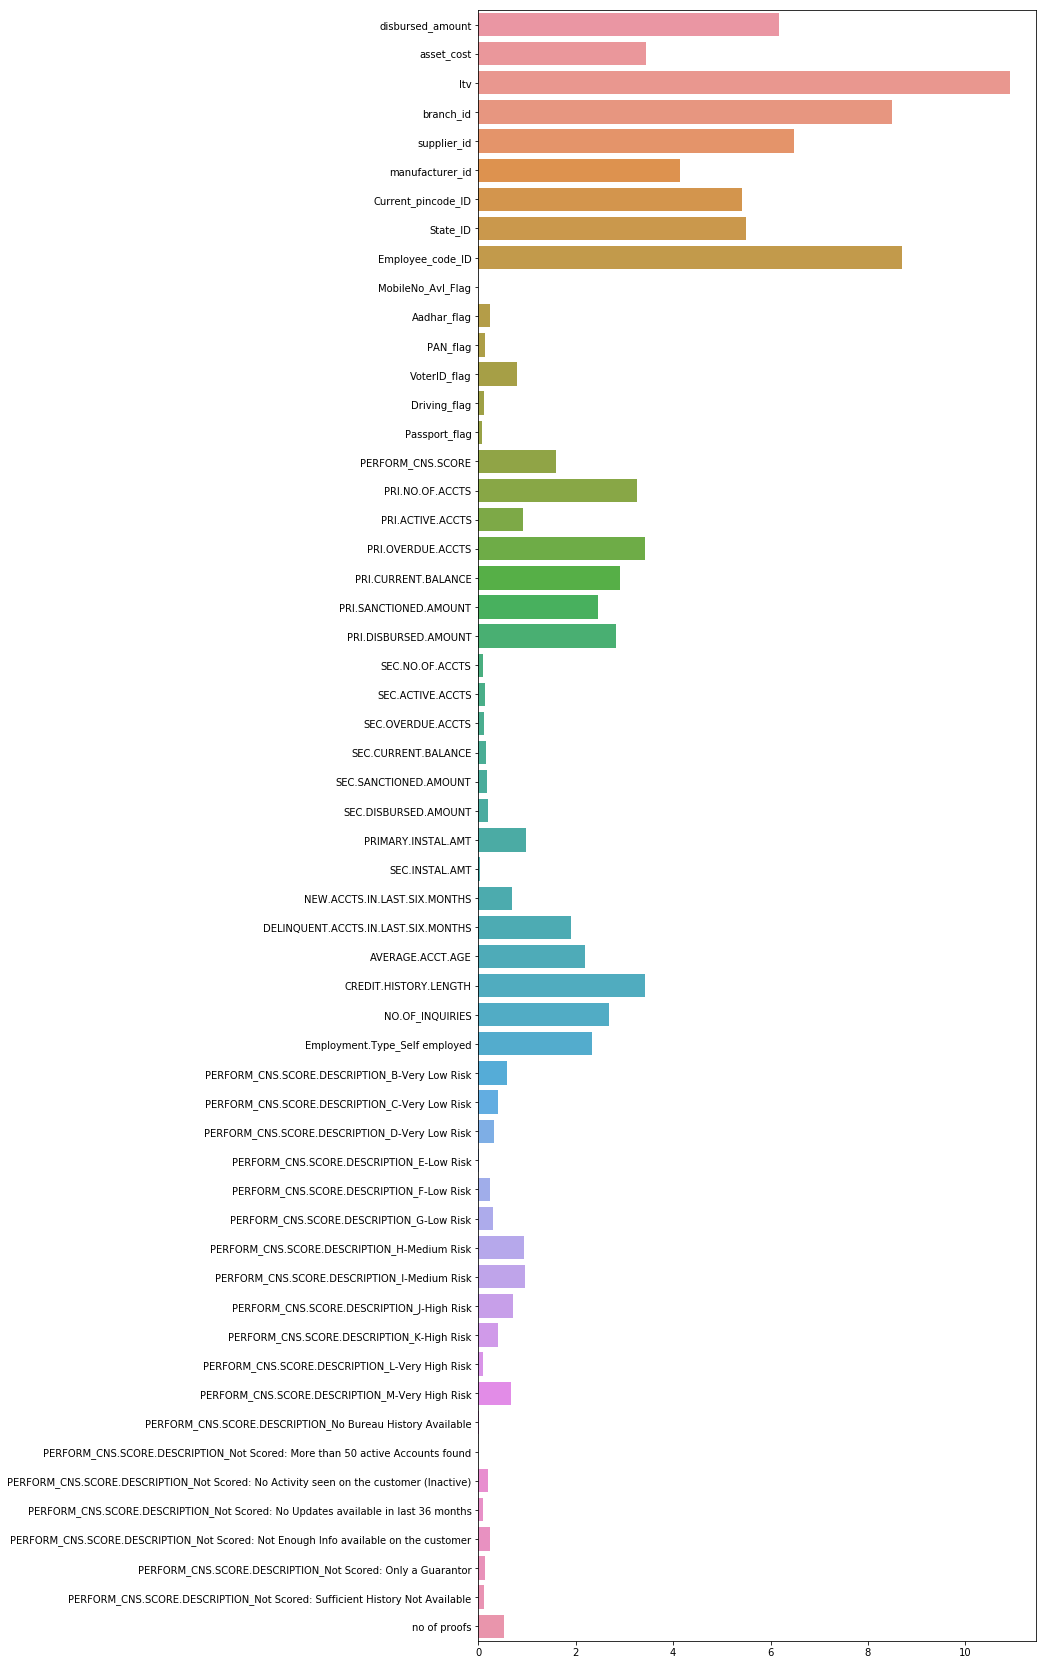

In [30]:
fig, ax = plt.subplots(figsize=(10, 30))
sns.barplot(cat_rg1.feature_importances_, trainfeature.drop('loan_default',axis=1).columns, ax=ax)
plt.show()

In [31]:
fea_imp_ = pd.DataFrame({'cols':trainfeature.drop('loan_default',axis=1).columns, 'fea_imp':cat_rg1.feature_importances_})
fea_imp_ =fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False).reset_index(drop=True)

In [32]:
fea_imp_[0:39].cols

0                                                   ltv
1                                      Employee_code_ID
2                                             branch_id
3                                           supplier_id
4                                      disbursed_amount
5                                              State_ID
6                                    Current_pincode_ID
7                                       manufacturer_id
8                                            asset_cost
9                                     PRI.OVERDUE.ACCTS
10                                CREDIT.HISTORY.LENGTH
11                                      PRI.NO.OF.ACCTS
12                                  PRI.CURRENT.BALANCE
13                                 PRI.DISBURSED.AMOUNT
14                                      NO.OF_INQUIRIES
15                                PRI.SANCTIONED.AMOUNT
16                        Employment.Type_Self employed
17                                     AVERAGE.A

In [84]:
from sklearn.preprocessing import LabelEncoder
lblcndr=LabelEncoder()
trainfeature['Employment.Type']=lblcndr.fit_transform(trainfeature['Employment.Type'])
testfeature['Employment.Type']=lblcndr.fit_transform(testfeature['Employment.Type'])

In [85]:
trainfeature['PERFORM_CNS.SCORE.DESCRIPTION']=lblcndr.fit_transform(trainfeature['PERFORM_CNS.SCORE.DESCRIPTION'])
testfeature['PERFORM_CNS.SCORE.DESCRIPTION']=lblcndr.fit_transform(testfeature['PERFORM_CNS.SCORE.DESCRIPTION'])

In [51]:
trainfeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 39 columns):
disbursed_amount                       233154 non-null float64
asset_cost                             233154 non-null float64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Employment.Type                        233154 non-null int64
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                            233154 non-null int64
PAN_flag                               233154 non-null int64
VoterID_flag                           233154 non-null int64
Driving_flag                 

In [86]:
#X=trainfeature[fea_imp_[0:39].cols]
#y=trainfeature['loan_default']
X=trainfeature.drop("loan_default",axis=1)
y=trainfeature['loan_default']


In [87]:
#testX=testfeature[fea_imp_[0:39].cols]
testX=testfeature

In [88]:
X_test =testX
y_test_pred = 0
y_valid_pred = 0*y

In [89]:
# Set up folds
from sklearn.model_selection import KFold
K = 5
kf = KFold(n_splits = K, random_state = 1, shuffle = True)
from numba import jit

In [90]:
# Compute gini

# from CPMP's kernel https://www.kaggle.com/cpmpml/extremely-fast-gini-computation
@jit
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

In [91]:
import catboost as cb
from sklearn.metrics import accuracy_score,f1_score
OPTIMIZE_ROUNDS = False
cat_ind1 = [3,4,5,6,7,8,9,17]
model=cb.CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',max_depth=8,learning_rate=0.01,od_wait=50
                     ,l2_leaf_reg=5,bagging_temperature=0.85,random_strength=100)

In [92]:

for i, (train_index, test_index) in enumerate(kf.split(trainfeature)):
    
    # Create data for this fold
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
    print( "\nFold ", i)
    
    # Run model for this fold
    if OPTIMIZE_ROUNDS:
        fit_model = model.fit( X_train, y_train, 
                               eval_set=[X_valid, y_valid],
                               early_stopping_rounds=100,
                               use_best_model=True
                             )
        print( "  N trees = ", model.tree_count_ )
    else:
        fit_model = model.fit( X_train, y_train )
        
    # Generate validation predictions for this fold
    pred = fit_model.predict_proba(X_valid)[:,1]
    print( "  Gini = ", eval_gini(y_valid, pred) )
    print( "  Accurancy = ", roc_auc_score(y_valid, pred))
    y_valid_pred.iloc[test_index] = pred
    
    # Accumulate test set predictions
    y_test_pred += fit_model.predict_proba(X_test)[:,1]
    
y_test_pred /= K  # Average test set predictions

print( "\nGini for full training set:" )
roc_auc_score(y, y_valid_pred, normalize=False)


Fold  0
0:	total: 77.9ms	remaining: 3m 53s
1:	total: 175ms	remaining: 4m 22s
2:	total: 275ms	remaining: 4m 35s
3:	total: 382ms	remaining: 4m 46s
4:	total: 485ms	remaining: 4m 50s
5:	total: 571ms	remaining: 4m 45s
6:	total: 681ms	remaining: 4m 51s
7:	total: 770ms	remaining: 4m 47s
8:	total: 872ms	remaining: 4m 49s
9:	total: 989ms	remaining: 4m 55s
10:	total: 1.08s	remaining: 4m 53s
11:	total: 1.18s	remaining: 4m 54s
12:	total: 1.3s	remaining: 4m 58s
13:	total: 1.41s	remaining: 5m
14:	total: 1.51s	remaining: 5m
15:	total: 1.61s	remaining: 5m
16:	total: 1.71s	remaining: 5m
17:	total: 1.81s	remaining: 5m
18:	total: 1.91s	remaining: 4m 59s
19:	total: 2s	remaining: 4m 57s
20:	total: 2.09s	remaining: 4m 56s
21:	total: 2.19s	remaining: 4m 56s
22:	total: 2.29s	remaining: 4m 56s
23:	total: 2.41s	remaining: 4m 58s
24:	total: 2.52s	remaining: 4m 59s
25:	total: 2.61s	remaining: 4m 58s
26:	total: 2.71s	remaining: 4m 58s
27:	total: 2.82s	remaining: 4m 59s
28:	total: 2.99s	remaining: 5m 6s
29:	total:

238:	total: 26.6s	remaining: 5m 7s
239:	total: 26.7s	remaining: 5m 7s
240:	total: 26.9s	remaining: 5m 8s
241:	total: 27.1s	remaining: 5m 8s
242:	total: 27.3s	remaining: 5m 9s
243:	total: 27.4s	remaining: 5m 9s
244:	total: 27.6s	remaining: 5m 10s
245:	total: 27.7s	remaining: 5m 10s
246:	total: 27.8s	remaining: 5m 9s
247:	total: 27.9s	remaining: 5m 9s
248:	total: 28s	remaining: 5m 9s
249:	total: 28.1s	remaining: 5m 9s
250:	total: 28.2s	remaining: 5m 9s
251:	total: 28.3s	remaining: 5m 9s
252:	total: 28.5s	remaining: 5m 9s
253:	total: 28.6s	remaining: 5m 8s
254:	total: 28.7s	remaining: 5m 8s
255:	total: 28.8s	remaining: 5m 8s
256:	total: 28.9s	remaining: 5m 8s
257:	total: 29s	remaining: 5m 8s
258:	total: 29.1s	remaining: 5m 8s
259:	total: 29.3s	remaining: 5m 8s
260:	total: 29.4s	remaining: 5m 8s
261:	total: 29.5s	remaining: 5m 8s
262:	total: 29.6s	remaining: 5m 7s
263:	total: 29.7s	remaining: 5m 7s
264:	total: 29.8s	remaining: 5m 7s
265:	total: 29.9s	remaining: 5m 7s
266:	total: 30s	remain

472:	total: 54.4s	remaining: 4m 50s
473:	total: 54.5s	remaining: 4m 50s
474:	total: 54.6s	remaining: 4m 50s
475:	total: 54.7s	remaining: 4m 50s
476:	total: 54.8s	remaining: 4m 49s
477:	total: 54.9s	remaining: 4m 49s
478:	total: 55s	remaining: 4m 49s
479:	total: 55.1s	remaining: 4m 49s
480:	total: 55.2s	remaining: 4m 49s
481:	total: 55.3s	remaining: 4m 49s
482:	total: 55.4s	remaining: 4m 48s
483:	total: 55.6s	remaining: 4m 48s
484:	total: 55.7s	remaining: 4m 48s
485:	total: 55.8s	remaining: 4m 48s
486:	total: 55.9s	remaining: 4m 48s
487:	total: 56.1s	remaining: 4m 48s
488:	total: 56.2s	remaining: 4m 48s
489:	total: 56.3s	remaining: 4m 48s
490:	total: 56.4s	remaining: 4m 48s
491:	total: 56.5s	remaining: 4m 47s
492:	total: 56.6s	remaining: 4m 47s
493:	total: 56.7s	remaining: 4m 47s
494:	total: 56.9s	remaining: 4m 47s
495:	total: 57s	remaining: 4m 47s
496:	total: 57.1s	remaining: 4m 47s
497:	total: 57.2s	remaining: 4m 47s
498:	total: 57.3s	remaining: 4m 47s
499:	total: 57.4s	remaining: 4m 

699:	total: 1m 19s	remaining: 4m 21s
700:	total: 1m 19s	remaining: 4m 21s
701:	total: 1m 19s	remaining: 4m 21s
702:	total: 1m 20s	remaining: 4m 21s
703:	total: 1m 20s	remaining: 4m 21s
704:	total: 1m 20s	remaining: 4m 21s
705:	total: 1m 20s	remaining: 4m 21s
706:	total: 1m 20s	remaining: 4m 21s
707:	total: 1m 20s	remaining: 4m 20s
708:	total: 1m 20s	remaining: 4m 20s
709:	total: 1m 20s	remaining: 4m 20s
710:	total: 1m 20s	remaining: 4m 20s
711:	total: 1m 21s	remaining: 4m 20s
712:	total: 1m 21s	remaining: 4m 20s
713:	total: 1m 21s	remaining: 4m 20s
714:	total: 1m 21s	remaining: 4m 20s
715:	total: 1m 21s	remaining: 4m 19s
716:	total: 1m 21s	remaining: 4m 19s
717:	total: 1m 21s	remaining: 4m 19s
718:	total: 1m 21s	remaining: 4m 19s
719:	total: 1m 21s	remaining: 4m 19s
720:	total: 1m 22s	remaining: 4m 19s
721:	total: 1m 22s	remaining: 4m 19s
722:	total: 1m 22s	remaining: 4m 19s
723:	total: 1m 22s	remaining: 4m 18s
724:	total: 1m 22s	remaining: 4m 18s
725:	total: 1m 22s	remaining: 4m 18s
7

925:	total: 1m 45s	remaining: 3m 55s
926:	total: 1m 45s	remaining: 3m 55s
927:	total: 1m 45s	remaining: 3m 55s
928:	total: 1m 45s	remaining: 3m 54s
929:	total: 1m 45s	remaining: 3m 54s
930:	total: 1m 45s	remaining: 3m 54s
931:	total: 1m 45s	remaining: 3m 54s
932:	total: 1m 45s	remaining: 3m 54s
933:	total: 1m 45s	remaining: 3m 54s
934:	total: 1m 46s	remaining: 3m 54s
935:	total: 1m 46s	remaining: 3m 54s
936:	total: 1m 46s	remaining: 3m 54s
937:	total: 1m 46s	remaining: 3m 53s
938:	total: 1m 46s	remaining: 3m 53s
939:	total: 1m 46s	remaining: 3m 53s
940:	total: 1m 46s	remaining: 3m 53s
941:	total: 1m 46s	remaining: 3m 53s
942:	total: 1m 46s	remaining: 3m 53s
943:	total: 1m 47s	remaining: 3m 53s
944:	total: 1m 47s	remaining: 3m 52s
945:	total: 1m 47s	remaining: 3m 52s
946:	total: 1m 47s	remaining: 3m 52s
947:	total: 1m 47s	remaining: 3m 52s
948:	total: 1m 47s	remaining: 3m 52s
949:	total: 1m 47s	remaining: 3m 52s
950:	total: 1m 47s	remaining: 3m 52s
951:	total: 1m 47s	remaining: 3m 52s
9

1146:	total: 2m 9s	remaining: 3m 29s
1147:	total: 2m 9s	remaining: 3m 29s
1148:	total: 2m 9s	remaining: 3m 29s
1149:	total: 2m 10s	remaining: 3m 29s
1150:	total: 2m 10s	remaining: 3m 29s
1151:	total: 2m 10s	remaining: 3m 29s
1152:	total: 2m 10s	remaining: 3m 28s
1153:	total: 2m 10s	remaining: 3m 28s
1154:	total: 2m 10s	remaining: 3m 28s
1155:	total: 2m 10s	remaining: 3m 28s
1156:	total: 2m 10s	remaining: 3m 28s
1157:	total: 2m 10s	remaining: 3m 28s
1158:	total: 2m 11s	remaining: 3m 28s
1159:	total: 2m 11s	remaining: 3m 27s
1160:	total: 2m 11s	remaining: 3m 27s
1161:	total: 2m 11s	remaining: 3m 27s
1162:	total: 2m 11s	remaining: 3m 27s
1163:	total: 2m 11s	remaining: 3m 27s
1164:	total: 2m 11s	remaining: 3m 27s
1165:	total: 2m 11s	remaining: 3m 27s
1166:	total: 2m 11s	remaining: 3m 27s
1167:	total: 2m 12s	remaining: 3m 27s
1168:	total: 2m 12s	remaining: 3m 27s
1169:	total: 2m 12s	remaining: 3m 26s
1170:	total: 2m 12s	remaining: 3m 26s
1171:	total: 2m 12s	remaining: 3m 26s
1172:	total: 2m

1363:	total: 2m 34s	remaining: 3m 5s
1364:	total: 2m 34s	remaining: 3m 5s
1365:	total: 2m 34s	remaining: 3m 4s
1366:	total: 2m 34s	remaining: 3m 4s
1367:	total: 2m 34s	remaining: 3m 4s
1368:	total: 2m 34s	remaining: 3m 4s
1369:	total: 2m 35s	remaining: 3m 4s
1370:	total: 2m 35s	remaining: 3m 4s
1371:	total: 2m 35s	remaining: 3m 4s
1372:	total: 2m 35s	remaining: 3m 4s
1373:	total: 2m 35s	remaining: 3m 4s
1374:	total: 2m 35s	remaining: 3m 4s
1375:	total: 2m 35s	remaining: 3m 3s
1376:	total: 2m 35s	remaining: 3m 3s
1377:	total: 2m 36s	remaining: 3m 3s
1378:	total: 2m 36s	remaining: 3m 3s
1379:	total: 2m 36s	remaining: 3m 3s
1380:	total: 2m 36s	remaining: 3m 3s
1381:	total: 2m 36s	remaining: 3m 3s
1382:	total: 2m 36s	remaining: 3m 3s
1383:	total: 2m 36s	remaining: 3m 3s
1384:	total: 2m 36s	remaining: 3m 2s
1385:	total: 2m 37s	remaining: 3m 2s
1386:	total: 2m 37s	remaining: 3m 2s
1387:	total: 2m 37s	remaining: 3m 2s
1388:	total: 2m 37s	remaining: 3m 2s
1389:	total: 2m 37s	remaining: 3m 2s
1

1581:	total: 3m	remaining: 2m 41s
1582:	total: 3m	remaining: 2m 41s
1583:	total: 3m	remaining: 2m 41s
1584:	total: 3m	remaining: 2m 41s
1585:	total: 3m	remaining: 2m 41s
1586:	total: 3m 1s	remaining: 2m 41s
1587:	total: 3m 1s	remaining: 2m 41s
1588:	total: 3m 1s	remaining: 2m 40s
1589:	total: 3m 1s	remaining: 2m 40s
1590:	total: 3m 1s	remaining: 2m 40s
1591:	total: 3m 1s	remaining: 2m 40s
1592:	total: 3m 1s	remaining: 2m 40s
1593:	total: 3m 1s	remaining: 2m 40s
1594:	total: 3m 2s	remaining: 2m 40s
1595:	total: 3m 2s	remaining: 2m 40s
1596:	total: 3m 2s	remaining: 2m 40s
1597:	total: 3m 2s	remaining: 2m 40s
1598:	total: 3m 2s	remaining: 2m 39s
1599:	total: 3m 2s	remaining: 2m 39s
1600:	total: 3m 2s	remaining: 2m 39s
1601:	total: 3m 2s	remaining: 2m 39s
1602:	total: 3m 2s	remaining: 2m 39s
1603:	total: 3m 3s	remaining: 2m 39s
1604:	total: 3m 3s	remaining: 2m 39s
1605:	total: 3m 3s	remaining: 2m 39s
1606:	total: 3m 3s	remaining: 2m 39s
1607:	total: 3m 3s	remaining: 2m 38s
1608:	total: 3m 

1801:	total: 3m 28s	remaining: 2m 18s
1802:	total: 3m 28s	remaining: 2m 18s
1803:	total: 3m 28s	remaining: 2m 18s
1804:	total: 3m 28s	remaining: 2m 18s
1805:	total: 3m 28s	remaining: 2m 17s
1806:	total: 3m 28s	remaining: 2m 17s
1807:	total: 3m 28s	remaining: 2m 17s
1808:	total: 3m 28s	remaining: 2m 17s
1809:	total: 3m 29s	remaining: 2m 17s
1810:	total: 3m 29s	remaining: 2m 17s
1811:	total: 3m 29s	remaining: 2m 17s
1812:	total: 3m 29s	remaining: 2m 17s
1813:	total: 3m 29s	remaining: 2m 17s
1814:	total: 3m 29s	remaining: 2m 16s
1815:	total: 3m 29s	remaining: 2m 16s
1816:	total: 3m 29s	remaining: 2m 16s
1817:	total: 3m 30s	remaining: 2m 16s
1818:	total: 3m 30s	remaining: 2m 16s
1819:	total: 3m 30s	remaining: 2m 16s
1820:	total: 3m 30s	remaining: 2m 16s
1821:	total: 3m 30s	remaining: 2m 16s
1822:	total: 3m 30s	remaining: 2m 16s
1823:	total: 3m 30s	remaining: 2m 15s
1824:	total: 3m 30s	remaining: 2m 15s
1825:	total: 3m 31s	remaining: 2m 15s
1826:	total: 3m 31s	remaining: 2m 15s
1827:	total:

2020:	total: 3m 54s	remaining: 1m 53s
2021:	total: 3m 54s	remaining: 1m 53s
2022:	total: 3m 54s	remaining: 1m 53s
2023:	total: 3m 54s	remaining: 1m 53s
2024:	total: 3m 54s	remaining: 1m 53s
2025:	total: 3m 54s	remaining: 1m 52s
2026:	total: 3m 55s	remaining: 1m 52s
2027:	total: 3m 55s	remaining: 1m 52s
2028:	total: 3m 55s	remaining: 1m 52s
2029:	total: 3m 55s	remaining: 1m 52s
2030:	total: 3m 55s	remaining: 1m 52s
2031:	total: 3m 55s	remaining: 1m 52s
2032:	total: 3m 55s	remaining: 1m 52s
2033:	total: 3m 55s	remaining: 1m 52s
2034:	total: 3m 56s	remaining: 1m 51s
2035:	total: 3m 56s	remaining: 1m 51s
2036:	total: 3m 56s	remaining: 1m 51s
2037:	total: 3m 56s	remaining: 1m 51s
2038:	total: 3m 56s	remaining: 1m 51s
2039:	total: 3m 56s	remaining: 1m 51s
2040:	total: 3m 56s	remaining: 1m 51s
2041:	total: 3m 56s	remaining: 1m 51s
2042:	total: 3m 56s	remaining: 1m 51s
2043:	total: 3m 57s	remaining: 1m 50s
2044:	total: 3m 57s	remaining: 1m 50s
2045:	total: 3m 57s	remaining: 1m 50s
2046:	total:

2240:	total: 4m 20s	remaining: 1m 28s
2241:	total: 4m 20s	remaining: 1m 28s
2242:	total: 4m 20s	remaining: 1m 27s
2243:	total: 4m 20s	remaining: 1m 27s
2244:	total: 4m 20s	remaining: 1m 27s
2245:	total: 4m 21s	remaining: 1m 27s
2246:	total: 4m 21s	remaining: 1m 27s
2247:	total: 4m 21s	remaining: 1m 27s
2248:	total: 4m 21s	remaining: 1m 27s
2249:	total: 4m 21s	remaining: 1m 27s
2250:	total: 4m 21s	remaining: 1m 27s
2251:	total: 4m 21s	remaining: 1m 26s
2252:	total: 4m 21s	remaining: 1m 26s
2253:	total: 4m 22s	remaining: 1m 26s
2254:	total: 4m 22s	remaining: 1m 26s
2255:	total: 4m 22s	remaining: 1m 26s
2256:	total: 4m 22s	remaining: 1m 26s
2257:	total: 4m 22s	remaining: 1m 26s
2258:	total: 4m 22s	remaining: 1m 26s
2259:	total: 4m 22s	remaining: 1m 26s
2260:	total: 4m 22s	remaining: 1m 25s
2261:	total: 4m 22s	remaining: 1m 25s
2262:	total: 4m 23s	remaining: 1m 25s
2263:	total: 4m 23s	remaining: 1m 25s
2264:	total: 4m 23s	remaining: 1m 25s
2265:	total: 4m 23s	remaining: 1m 25s
2266:	total:

2459:	total: 4m 47s	remaining: 1m 3s
2460:	total: 4m 47s	remaining: 1m 2s
2461:	total: 4m 47s	remaining: 1m 2s
2462:	total: 4m 47s	remaining: 1m 2s
2463:	total: 4m 47s	remaining: 1m 2s
2464:	total: 4m 47s	remaining: 1m 2s
2465:	total: 4m 47s	remaining: 1m 2s
2466:	total: 4m 48s	remaining: 1m 2s
2467:	total: 4m 48s	remaining: 1m 2s
2468:	total: 4m 48s	remaining: 1m 2s
2469:	total: 4m 48s	remaining: 1m 1s
2470:	total: 4m 48s	remaining: 1m 1s
2471:	total: 4m 48s	remaining: 1m 1s
2472:	total: 4m 48s	remaining: 1m 1s
2473:	total: 4m 48s	remaining: 1m 1s
2474:	total: 4m 49s	remaining: 1m 1s
2475:	total: 4m 49s	remaining: 1m 1s
2476:	total: 4m 49s	remaining: 1m 1s
2477:	total: 4m 49s	remaining: 1m
2478:	total: 4m 49s	remaining: 1m
2479:	total: 4m 49s	remaining: 1m
2480:	total: 4m 49s	remaining: 1m
2481:	total: 4m 49s	remaining: 1m
2482:	total: 4m 49s	remaining: 1m
2483:	total: 4m 50s	remaining: 1m
2484:	total: 4m 50s	remaining: 1m
2485:	total: 4m 50s	remaining: 1m
2486:	total: 4m 50s	remainin

2687:	total: 5m 14s	remaining: 36.5s
2688:	total: 5m 14s	remaining: 36.4s
2689:	total: 5m 14s	remaining: 36.3s
2690:	total: 5m 15s	remaining: 36.2s
2691:	total: 5m 15s	remaining: 36.1s
2692:	total: 5m 15s	remaining: 36s
2693:	total: 5m 15s	remaining: 35.8s
2694:	total: 5m 15s	remaining: 35.7s
2695:	total: 5m 15s	remaining: 35.6s
2696:	total: 5m 15s	remaining: 35.5s
2697:	total: 5m 15s	remaining: 35.4s
2698:	total: 5m 16s	remaining: 35.2s
2699:	total: 5m 16s	remaining: 35.1s
2700:	total: 5m 16s	remaining: 35s
2701:	total: 5m 16s	remaining: 34.9s
2702:	total: 5m 16s	remaining: 34.8s
2703:	total: 5m 16s	remaining: 34.7s
2704:	total: 5m 16s	remaining: 34.5s
2705:	total: 5m 16s	remaining: 34.4s
2706:	total: 5m 16s	remaining: 34.3s
2707:	total: 5m 17s	remaining: 34.2s
2708:	total: 5m 17s	remaining: 34.1s
2709:	total: 5m 17s	remaining: 34s
2710:	total: 5m 17s	remaining: 33.8s
2711:	total: 5m 17s	remaining: 33.7s
2712:	total: 5m 17s	remaining: 33.6s
2713:	total: 5m 17s	remaining: 33.5s
2714:	t

2910:	total: 5m 42s	remaining: 10.5s
2911:	total: 5m 42s	remaining: 10.4s
2912:	total: 5m 42s	remaining: 10.2s
2913:	total: 5m 43s	remaining: 10.1s
2914:	total: 5m 43s	remaining: 10s
2915:	total: 5m 43s	remaining: 9.89s
2916:	total: 5m 43s	remaining: 9.78s
2917:	total: 5m 43s	remaining: 9.66s
2918:	total: 5m 43s	remaining: 9.54s
2919:	total: 5m 44s	remaining: 9.43s
2920:	total: 5m 44s	remaining: 9.31s
2921:	total: 5m 44s	remaining: 9.19s
2922:	total: 5m 44s	remaining: 9.08s
2923:	total: 5m 44s	remaining: 8.96s
2924:	total: 5m 44s	remaining: 8.84s
2925:	total: 5m 45s	remaining: 8.73s
2926:	total: 5m 45s	remaining: 8.61s
2927:	total: 5m 45s	remaining: 8.49s
2928:	total: 5m 45s	remaining: 8.37s
2929:	total: 5m 45s	remaining: 8.26s
2930:	total: 5m 45s	remaining: 8.14s
2931:	total: 5m 45s	remaining: 8.02s
2932:	total: 5m 45s	remaining: 7.9s
2933:	total: 5m 45s	remaining: 7.78s
2934:	total: 5m 46s	remaining: 7.66s
2935:	total: 5m 46s	remaining: 7.55s
2936:	total: 5m 46s	remaining: 7.43s
2937

138:	total: 18.5s	remaining: 6m 20s
139:	total: 18.6s	remaining: 6m 20s
140:	total: 18.8s	remaining: 6m 21s
141:	total: 19s	remaining: 6m 21s
142:	total: 19.1s	remaining: 6m 22s
143:	total: 19.3s	remaining: 6m 22s
144:	total: 19.5s	remaining: 6m 23s
145:	total: 19.7s	remaining: 6m 24s
146:	total: 19.9s	remaining: 6m 25s
147:	total: 20s	remaining: 6m 25s
148:	total: 20.2s	remaining: 6m 27s
149:	total: 20.4s	remaining: 6m 27s
150:	total: 20.6s	remaining: 6m 28s
151:	total: 20.7s	remaining: 6m 27s
152:	total: 20.8s	remaining: 6m 27s
153:	total: 20.9s	remaining: 6m 26s
154:	total: 21s	remaining: 6m 25s
155:	total: 21.1s	remaining: 6m 24s
156:	total: 21.2s	remaining: 6m 23s
157:	total: 21.3s	remaining: 6m 22s
158:	total: 21.4s	remaining: 6m 22s
159:	total: 21.5s	remaining: 6m 21s
160:	total: 21.6s	remaining: 6m 20s
161:	total: 21.7s	remaining: 6m 19s
162:	total: 21.8s	remaining: 6m 18s
163:	total: 21.9s	remaining: 6m 18s
164:	total: 22s	remaining: 6m 17s
165:	total: 22.1s	remaining: 6m 17s


371:	total: 49.9s	remaining: 5m 52s
372:	total: 50s	remaining: 5m 52s
373:	total: 50.2s	remaining: 5m 52s
374:	total: 50.3s	remaining: 5m 51s
375:	total: 50.4s	remaining: 5m 51s
376:	total: 50.5s	remaining: 5m 51s
377:	total: 50.6s	remaining: 5m 50s
378:	total: 50.7s	remaining: 5m 50s
379:	total: 50.8s	remaining: 5m 50s
380:	total: 50.9s	remaining: 5m 49s
381:	total: 51s	remaining: 5m 49s
382:	total: 51.2s	remaining: 5m 49s
383:	total: 51.4s	remaining: 5m 49s
384:	total: 51.5s	remaining: 5m 49s
385:	total: 51.7s	remaining: 5m 50s
386:	total: 51.8s	remaining: 5m 49s
387:	total: 52s	remaining: 5m 50s
388:	total: 52.2s	remaining: 5m 50s
389:	total: 52.4s	remaining: 5m 50s
390:	total: 52.5s	remaining: 5m 50s
391:	total: 52.7s	remaining: 5m 50s
392:	total: 52.9s	remaining: 5m 50s
393:	total: 53.1s	remaining: 5m 51s
394:	total: 53.3s	remaining: 5m 51s
395:	total: 53.5s	remaining: 5m 51s
396:	total: 53.6s	remaining: 5m 51s
397:	total: 53.8s	remaining: 5m 51s
398:	total: 54s	remaining: 5m 51s


598:	total: 1m 19s	remaining: 5m 20s
599:	total: 1m 20s	remaining: 5m 20s
600:	total: 1m 20s	remaining: 5m 20s
601:	total: 1m 20s	remaining: 5m 20s
602:	total: 1m 20s	remaining: 5m 20s
603:	total: 1m 20s	remaining: 5m 20s
604:	total: 1m 20s	remaining: 5m 20s
605:	total: 1m 21s	remaining: 5m 20s
606:	total: 1m 21s	remaining: 5m 20s
607:	total: 1m 21s	remaining: 5m 20s
608:	total: 1m 21s	remaining: 5m 19s
609:	total: 1m 21s	remaining: 5m 19s
610:	total: 1m 21s	remaining: 5m 19s
611:	total: 1m 21s	remaining: 5m 19s
612:	total: 1m 21s	remaining: 5m 18s
613:	total: 1m 21s	remaining: 5m 18s
614:	total: 1m 22s	remaining: 5m 18s
615:	total: 1m 22s	remaining: 5m 17s
616:	total: 1m 22s	remaining: 5m 17s
617:	total: 1m 22s	remaining: 5m 17s
618:	total: 1m 22s	remaining: 5m 17s
619:	total: 1m 22s	remaining: 5m 16s
620:	total: 1m 22s	remaining: 5m 16s
621:	total: 1m 22s	remaining: 5m 16s
622:	total: 1m 22s	remaining: 5m 16s
623:	total: 1m 22s	remaining: 5m 15s
624:	total: 1m 23s	remaining: 5m 15s
6

822:	total: 1m 49s	remaining: 4m 49s
823:	total: 1m 49s	remaining: 4m 49s
824:	total: 1m 49s	remaining: 4m 49s
825:	total: 1m 49s	remaining: 4m 49s
826:	total: 1m 49s	remaining: 4m 48s
827:	total: 1m 50s	remaining: 4m 48s
828:	total: 1m 50s	remaining: 4m 48s
829:	total: 1m 50s	remaining: 4m 48s
830:	total: 1m 50s	remaining: 4m 47s
831:	total: 1m 50s	remaining: 4m 47s
832:	total: 1m 50s	remaining: 4m 47s
833:	total: 1m 50s	remaining: 4m 47s
834:	total: 1m 50s	remaining: 4m 47s
835:	total: 1m 50s	remaining: 4m 47s
836:	total: 1m 51s	remaining: 4m 46s
837:	total: 1m 51s	remaining: 4m 46s
838:	total: 1m 51s	remaining: 4m 46s
839:	total: 1m 51s	remaining: 4m 46s
840:	total: 1m 51s	remaining: 4m 46s
841:	total: 1m 51s	remaining: 4m 46s
842:	total: 1m 52s	remaining: 4m 46s
843:	total: 1m 52s	remaining: 4m 46s
844:	total: 1m 52s	remaining: 4m 46s
845:	total: 1m 52s	remaining: 4m 46s
846:	total: 1m 52s	remaining: 4m 46s
847:	total: 1m 52s	remaining: 4m 46s
848:	total: 1m 53s	remaining: 4m 46s
8

1046:	total: 2m 19s	remaining: 4m 20s
1047:	total: 2m 19s	remaining: 4m 20s
1048:	total: 2m 20s	remaining: 4m 20s
1049:	total: 2m 20s	remaining: 4m 20s
1050:	total: 2m 20s	remaining: 4m 20s
1051:	total: 2m 20s	remaining: 4m 20s
1052:	total: 2m 20s	remaining: 4m 20s
1053:	total: 2m 20s	remaining: 4m 20s
1054:	total: 2m 21s	remaining: 4m 20s
1055:	total: 2m 21s	remaining: 4m 19s
1056:	total: 2m 21s	remaining: 4m 19s
1057:	total: 2m 21s	remaining: 4m 19s
1058:	total: 2m 21s	remaining: 4m 19s
1059:	total: 2m 21s	remaining: 4m 19s
1060:	total: 2m 21s	remaining: 4m 19s
1061:	total: 2m 21s	remaining: 4m 19s
1062:	total: 2m 22s	remaining: 4m 18s
1063:	total: 2m 22s	remaining: 4m 18s
1064:	total: 2m 22s	remaining: 4m 18s
1065:	total: 2m 22s	remaining: 4m 18s
1066:	total: 2m 22s	remaining: 4m 18s
1067:	total: 2m 22s	remaining: 4m 18s
1068:	total: 2m 22s	remaining: 4m 18s
1069:	total: 2m 22s	remaining: 4m 17s
1070:	total: 2m 23s	remaining: 4m 17s
1071:	total: 2m 23s	remaining: 4m 17s
1072:	total:

1264:	total: 2m 46s	remaining: 3m 48s
1265:	total: 2m 46s	remaining: 3m 48s
1266:	total: 2m 47s	remaining: 3m 48s
1267:	total: 2m 47s	remaining: 3m 48s
1268:	total: 2m 47s	remaining: 3m 48s
1269:	total: 2m 47s	remaining: 3m 48s
1270:	total: 2m 47s	remaining: 3m 47s
1271:	total: 2m 47s	remaining: 3m 47s
1272:	total: 2m 47s	remaining: 3m 47s
1273:	total: 2m 47s	remaining: 3m 47s
1274:	total: 2m 48s	remaining: 3m 47s
1275:	total: 2m 48s	remaining: 3m 47s
1276:	total: 2m 48s	remaining: 3m 46s
1277:	total: 2m 48s	remaining: 3m 46s
1278:	total: 2m 48s	remaining: 3m 46s
1279:	total: 2m 48s	remaining: 3m 46s
1280:	total: 2m 48s	remaining: 3m 46s
1281:	total: 2m 48s	remaining: 3m 46s
1282:	total: 2m 48s	remaining: 3m 46s
1283:	total: 2m 49s	remaining: 3m 45s
1284:	total: 2m 49s	remaining: 3m 45s
1285:	total: 2m 49s	remaining: 3m 45s
1286:	total: 2m 49s	remaining: 3m 45s
1287:	total: 2m 49s	remaining: 3m 45s
1288:	total: 2m 49s	remaining: 3m 45s
1289:	total: 2m 49s	remaining: 3m 45s
1290:	total:

1484:	total: 3m 12s	remaining: 3m 15s
1485:	total: 3m 12s	remaining: 3m 15s
1486:	total: 3m 12s	remaining: 3m 15s
1487:	total: 3m 12s	remaining: 3m 15s
1488:	total: 3m 12s	remaining: 3m 15s
1489:	total: 3m 12s	remaining: 3m 15s
1490:	total: 3m 12s	remaining: 3m 15s
1491:	total: 3m 12s	remaining: 3m 14s
1492:	total: 3m 12s	remaining: 3m 14s
1493:	total: 3m 13s	remaining: 3m 14s
1494:	total: 3m 13s	remaining: 3m 14s
1495:	total: 3m 13s	remaining: 3m 14s
1496:	total: 3m 13s	remaining: 3m 14s
1497:	total: 3m 13s	remaining: 3m 14s
1498:	total: 3m 13s	remaining: 3m 13s
1499:	total: 3m 13s	remaining: 3m 13s
1500:	total: 3m 13s	remaining: 3m 13s
1501:	total: 3m 13s	remaining: 3m 13s
1502:	total: 3m 14s	remaining: 3m 13s
1503:	total: 3m 14s	remaining: 3m 13s
1504:	total: 3m 14s	remaining: 3m 13s
1505:	total: 3m 14s	remaining: 3m 12s
1506:	total: 3m 14s	remaining: 3m 12s
1507:	total: 3m 14s	remaining: 3m 12s
1508:	total: 3m 14s	remaining: 3m 12s
1509:	total: 3m 14s	remaining: 3m 12s
1510:	total:

1702:	total: 3m 38s	remaining: 2m 46s
1703:	total: 3m 38s	remaining: 2m 45s
1704:	total: 3m 38s	remaining: 2m 45s
1705:	total: 3m 38s	remaining: 2m 45s
1706:	total: 3m 38s	remaining: 2m 45s
1707:	total: 3m 38s	remaining: 2m 45s
1708:	total: 3m 38s	remaining: 2m 45s
1709:	total: 3m 38s	remaining: 2m 45s
1710:	total: 3m 38s	remaining: 2m 44s
1711:	total: 3m 39s	remaining: 2m 44s
1712:	total: 3m 39s	remaining: 2m 44s
1713:	total: 3m 39s	remaining: 2m 44s
1714:	total: 3m 39s	remaining: 2m 44s
1715:	total: 3m 39s	remaining: 2m 44s
1716:	total: 3m 39s	remaining: 2m 44s
1717:	total: 3m 39s	remaining: 2m 43s
1718:	total: 3m 39s	remaining: 2m 43s
1719:	total: 3m 40s	remaining: 2m 43s
1720:	total: 3m 40s	remaining: 2m 43s
1721:	total: 3m 40s	remaining: 2m 43s
1722:	total: 3m 40s	remaining: 2m 43s
1723:	total: 3m 40s	remaining: 2m 43s
1724:	total: 3m 40s	remaining: 2m 43s
1725:	total: 3m 40s	remaining: 2m 42s
1726:	total: 3m 40s	remaining: 2m 42s
1727:	total: 3m 40s	remaining: 2m 42s
1728:	total:

1920:	total: 4m 3s	remaining: 2m 16s
1921:	total: 4m 3s	remaining: 2m 16s
1922:	total: 4m 3s	remaining: 2m 16s
1923:	total: 4m 3s	remaining: 2m 16s
1924:	total: 4m 3s	remaining: 2m 16s
1925:	total: 4m 3s	remaining: 2m 15s
1926:	total: 4m 3s	remaining: 2m 15s
1927:	total: 4m 4s	remaining: 2m 15s
1928:	total: 4m 4s	remaining: 2m 15s
1929:	total: 4m 4s	remaining: 2m 15s
1930:	total: 4m 4s	remaining: 2m 15s
1931:	total: 4m 4s	remaining: 2m 15s
1932:	total: 4m 4s	remaining: 2m 15s
1933:	total: 4m 4s	remaining: 2m 14s
1934:	total: 4m 4s	remaining: 2m 14s
1935:	total: 4m 4s	remaining: 2m 14s
1936:	total: 4m 5s	remaining: 2m 14s
1937:	total: 4m 5s	remaining: 2m 14s
1938:	total: 4m 5s	remaining: 2m 14s
1939:	total: 4m 5s	remaining: 2m 14s
1940:	total: 4m 5s	remaining: 2m 13s
1941:	total: 4m 5s	remaining: 2m 13s
1942:	total: 4m 5s	remaining: 2m 13s
1943:	total: 4m 5s	remaining: 2m 13s
1944:	total: 4m 6s	remaining: 2m 13s
1945:	total: 4m 6s	remaining: 2m 13s
1946:	total: 4m 6s	remaining: 2m 13s
1

2140:	total: 4m 28s	remaining: 1m 47s
2141:	total: 4m 29s	remaining: 1m 47s
2142:	total: 4m 29s	remaining: 1m 47s
2143:	total: 4m 29s	remaining: 1m 47s
2144:	total: 4m 29s	remaining: 1m 47s
2145:	total: 4m 29s	remaining: 1m 47s
2146:	total: 4m 29s	remaining: 1m 47s
2147:	total: 4m 29s	remaining: 1m 46s
2148:	total: 4m 29s	remaining: 1m 46s
2149:	total: 4m 29s	remaining: 1m 46s
2150:	total: 4m 30s	remaining: 1m 46s
2151:	total: 4m 30s	remaining: 1m 46s
2152:	total: 4m 30s	remaining: 1m 46s
2153:	total: 4m 30s	remaining: 1m 46s
2154:	total: 4m 30s	remaining: 1m 46s
2155:	total: 4m 30s	remaining: 1m 45s
2156:	total: 4m 30s	remaining: 1m 45s
2157:	total: 4m 30s	remaining: 1m 45s
2158:	total: 4m 31s	remaining: 1m 45s
2159:	total: 4m 31s	remaining: 1m 45s
2160:	total: 4m 31s	remaining: 1m 45s
2161:	total: 4m 31s	remaining: 1m 45s
2162:	total: 4m 31s	remaining: 1m 45s
2163:	total: 4m 31s	remaining: 1m 44s
2164:	total: 4m 31s	remaining: 1m 44s
2165:	total: 4m 31s	remaining: 1m 44s
2166:	total:

2356:	total: 4m 53s	remaining: 1m 20s
2357:	total: 4m 53s	remaining: 1m 20s
2358:	total: 4m 53s	remaining: 1m 19s
2359:	total: 4m 54s	remaining: 1m 19s
2360:	total: 4m 54s	remaining: 1m 19s
2361:	total: 4m 54s	remaining: 1m 19s
2362:	total: 4m 54s	remaining: 1m 19s
2363:	total: 4m 54s	remaining: 1m 19s
2364:	total: 4m 54s	remaining: 1m 19s
2365:	total: 4m 54s	remaining: 1m 18s
2366:	total: 4m 54s	remaining: 1m 18s
2367:	total: 4m 54s	remaining: 1m 18s
2368:	total: 4m 55s	remaining: 1m 18s
2369:	total: 4m 55s	remaining: 1m 18s
2370:	total: 4m 55s	remaining: 1m 18s
2371:	total: 4m 55s	remaining: 1m 18s
2372:	total: 4m 55s	remaining: 1m 18s
2373:	total: 4m 55s	remaining: 1m 17s
2374:	total: 4m 55s	remaining: 1m 17s
2375:	total: 4m 55s	remaining: 1m 17s
2376:	total: 4m 56s	remaining: 1m 17s
2377:	total: 4m 56s	remaining: 1m 17s
2378:	total: 4m 56s	remaining: 1m 17s
2379:	total: 4m 56s	remaining: 1m 17s
2380:	total: 4m 56s	remaining: 1m 17s
2381:	total: 4m 56s	remaining: 1m 16s
2382:	total:

2580:	total: 5m 19s	remaining: 51.9s
2581:	total: 5m 19s	remaining: 51.7s
2582:	total: 5m 19s	remaining: 51.6s
2583:	total: 5m 19s	remaining: 51.5s
2584:	total: 5m 19s	remaining: 51.4s
2585:	total: 5m 20s	remaining: 51.2s
2586:	total: 5m 20s	remaining: 51.1s
2587:	total: 5m 20s	remaining: 51s
2588:	total: 5m 20s	remaining: 50.9s
2589:	total: 5m 20s	remaining: 50.7s
2590:	total: 5m 20s	remaining: 50.6s
2591:	total: 5m 20s	remaining: 50.5s
2592:	total: 5m 20s	remaining: 50.4s
2593:	total: 5m 20s	remaining: 50.2s
2594:	total: 5m 21s	remaining: 50.1s
2595:	total: 5m 21s	remaining: 50s
2596:	total: 5m 21s	remaining: 49.9s
2597:	total: 5m 21s	remaining: 49.7s
2598:	total: 5m 21s	remaining: 49.6s
2599:	total: 5m 21s	remaining: 49.5s
2600:	total: 5m 21s	remaining: 49.4s
2601:	total: 5m 21s	remaining: 49.2s
2602:	total: 5m 21s	remaining: 49.1s
2603:	total: 5m 22s	remaining: 49s
2604:	total: 5m 22s	remaining: 48.9s
2605:	total: 5m 22s	remaining: 48.7s
2606:	total: 5m 22s	remaining: 48.6s
2607:	t

2803:	total: 5m 45s	remaining: 24.1s
2804:	total: 5m 45s	remaining: 24s
2805:	total: 5m 45s	remaining: 23.9s
2806:	total: 5m 45s	remaining: 23.8s
2807:	total: 5m 45s	remaining: 23.6s
2808:	total: 5m 45s	remaining: 23.5s
2809:	total: 5m 46s	remaining: 23.4s
2810:	total: 5m 46s	remaining: 23.3s
2811:	total: 5m 46s	remaining: 23.2s
2812:	total: 5m 46s	remaining: 23s
2813:	total: 5m 46s	remaining: 22.9s
2814:	total: 5m 46s	remaining: 22.8s
2815:	total: 5m 47s	remaining: 22.7s
2816:	total: 5m 47s	remaining: 22.6s
2817:	total: 5m 47s	remaining: 22.4s
2818:	total: 5m 47s	remaining: 22.3s
2819:	total: 5m 47s	remaining: 22.2s
2820:	total: 5m 47s	remaining: 22.1s
2821:	total: 5m 48s	remaining: 22s
2822:	total: 5m 48s	remaining: 21.8s
2823:	total: 5m 48s	remaining: 21.7s
2824:	total: 5m 48s	remaining: 21.6s
2825:	total: 5m 48s	remaining: 21.5s
2826:	total: 5m 48s	remaining: 21.4s
2827:	total: 5m 49s	remaining: 21.2s
2828:	total: 5m 49s	remaining: 21.1s
2829:	total: 5m 49s	remaining: 21s
2830:	tot

30:	total: 3.21s	remaining: 5m 7s
31:	total: 3.4s	remaining: 5m 15s
32:	total: 3.58s	remaining: 5m 21s
33:	total: 3.77s	remaining: 5m 28s
34:	total: 3.96s	remaining: 5m 35s
35:	total: 4.11s	remaining: 5m 38s
36:	total: 4.27s	remaining: 5m 41s
37:	total: 4.46s	remaining: 5m 47s
38:	total: 4.63s	remaining: 5m 51s
39:	total: 4.8s	remaining: 5m 55s
40:	total: 4.97s	remaining: 5m 58s
41:	total: 5.12s	remaining: 6m
42:	total: 5.27s	remaining: 6m 2s
43:	total: 5.43s	remaining: 6m 4s
44:	total: 5.59s	remaining: 6m 7s
45:	total: 5.77s	remaining: 6m 10s
46:	total: 5.93s	remaining: 6m 12s
47:	total: 6.04s	remaining: 6m 11s
48:	total: 6.13s	remaining: 6m 9s
49:	total: 6.26s	remaining: 6m 9s
50:	total: 6.35s	remaining: 6m 7s
51:	total: 6.45s	remaining: 6m 5s
52:	total: 6.54s	remaining: 6m 3s
53:	total: 6.63s	remaining: 6m 1s
54:	total: 6.71s	remaining: 5m 59s
55:	total: 6.82s	remaining: 5m 58s
56:	total: 6.91s	remaining: 5m 56s
57:	total: 6.99s	remaining: 5m 54s
58:	total: 7.08s	remaining: 5m 52s
5

265:	total: 34s	remaining: 5m 49s
266:	total: 34.1s	remaining: 5m 49s
267:	total: 34.3s	remaining: 5m 49s
268:	total: 34.3s	remaining: 5m 48s
269:	total: 34.4s	remaining: 5m 48s
270:	total: 34.6s	remaining: 5m 48s
271:	total: 34.7s	remaining: 5m 48s
272:	total: 34.9s	remaining: 5m 48s
273:	total: 35.1s	remaining: 5m 49s
274:	total: 35.3s	remaining: 5m 49s
275:	total: 35.5s	remaining: 5m 49s
276:	total: 35.6s	remaining: 5m 50s
277:	total: 35.8s	remaining: 5m 50s
278:	total: 35.9s	remaining: 5m 50s
279:	total: 36.1s	remaining: 5m 50s
280:	total: 36.2s	remaining: 5m 50s
281:	total: 36.4s	remaining: 5m 50s
282:	total: 36.6s	remaining: 5m 50s
283:	total: 36.7s	remaining: 5m 51s
284:	total: 36.9s	remaining: 5m 51s
285:	total: 37.1s	remaining: 5m 51s
286:	total: 37.3s	remaining: 5m 52s
287:	total: 37.4s	remaining: 5m 52s
288:	total: 37.6s	remaining: 5m 52s
289:	total: 37.7s	remaining: 5m 52s
290:	total: 37.8s	remaining: 5m 52s
291:	total: 37.9s	remaining: 5m 51s
292:	total: 38s	remaining: 5m 

495:	total: 1m 5s	remaining: 5m 31s
496:	total: 1m 5s	remaining: 5m 31s
497:	total: 1m 5s	remaining: 5m 30s
498:	total: 1m 5s	remaining: 5m 30s
499:	total: 1m 6s	remaining: 5m 30s
500:	total: 1m 6s	remaining: 5m 29s
501:	total: 1m 6s	remaining: 5m 29s
502:	total: 1m 6s	remaining: 5m 29s
503:	total: 1m 6s	remaining: 5m 29s
504:	total: 1m 6s	remaining: 5m 28s
505:	total: 1m 6s	remaining: 5m 28s
506:	total: 1m 6s	remaining: 5m 28s
507:	total: 1m 6s	remaining: 5m 28s
508:	total: 1m 6s	remaining: 5m 27s
509:	total: 1m 7s	remaining: 5m 27s
510:	total: 1m 7s	remaining: 5m 28s
511:	total: 1m 7s	remaining: 5m 28s
512:	total: 1m 7s	remaining: 5m 28s
513:	total: 1m 7s	remaining: 5m 28s
514:	total: 1m 7s	remaining: 5m 28s
515:	total: 1m 8s	remaining: 5m 28s
516:	total: 1m 8s	remaining: 5m 28s
517:	total: 1m 8s	remaining: 5m 28s
518:	total: 1m 8s	remaining: 5m 27s
519:	total: 1m 8s	remaining: 5m 28s
520:	total: 1m 8s	remaining: 5m 28s
521:	total: 1m 9s	remaining: 5m 28s
522:	total: 1m 9s	remaining:

720:	total: 1m 34s	remaining: 4m 58s
721:	total: 1m 34s	remaining: 4m 58s
722:	total: 1m 34s	remaining: 4m 58s
723:	total: 1m 34s	remaining: 4m 58s
724:	total: 1m 35s	remaining: 4m 58s
725:	total: 1m 35s	remaining: 4m 58s
726:	total: 1m 35s	remaining: 4m 58s
727:	total: 1m 35s	remaining: 4m 58s
728:	total: 1m 35s	remaining: 4m 58s
729:	total: 1m 35s	remaining: 4m 58s
730:	total: 1m 36s	remaining: 4m 58s
731:	total: 1m 36s	remaining: 4m 57s
732:	total: 1m 36s	remaining: 4m 57s
733:	total: 1m 36s	remaining: 4m 57s
734:	total: 1m 36s	remaining: 4m 57s
735:	total: 1m 36s	remaining: 4m 57s
736:	total: 1m 37s	remaining: 4m 57s
737:	total: 1m 37s	remaining: 4m 57s
738:	total: 1m 37s	remaining: 4m 57s
739:	total: 1m 37s	remaining: 4m 57s
740:	total: 1m 37s	remaining: 4m 57s
741:	total: 1m 37s	remaining: 4m 57s
742:	total: 1m 37s	remaining: 4m 56s
743:	total: 1m 37s	remaining: 4m 56s
744:	total: 1m 37s	remaining: 4m 56s
745:	total: 1m 38s	remaining: 4m 56s
746:	total: 1m 38s	remaining: 4m 55s
7

943:	total: 2m 3s	remaining: 4m 29s
944:	total: 2m 3s	remaining: 4m 29s
945:	total: 2m 3s	remaining: 4m 28s
946:	total: 2m 3s	remaining: 4m 28s
947:	total: 2m 3s	remaining: 4m 28s
948:	total: 2m 4s	remaining: 4m 28s
949:	total: 2m 4s	remaining: 4m 27s
950:	total: 2m 4s	remaining: 4m 27s
951:	total: 2m 4s	remaining: 4m 27s
952:	total: 2m 4s	remaining: 4m 27s
953:	total: 2m 4s	remaining: 4m 27s
954:	total: 2m 4s	remaining: 4m 27s
955:	total: 2m 4s	remaining: 4m 26s
956:	total: 2m 4s	remaining: 4m 26s
957:	total: 2m 4s	remaining: 4m 26s
958:	total: 2m 5s	remaining: 4m 26s
959:	total: 2m 5s	remaining: 4m 25s
960:	total: 2m 5s	remaining: 4m 25s
961:	total: 2m 5s	remaining: 4m 25s
962:	total: 2m 5s	remaining: 4m 25s
963:	total: 2m 5s	remaining: 4m 25s
964:	total: 2m 5s	remaining: 4m 25s
965:	total: 2m 6s	remaining: 4m 25s
966:	total: 2m 6s	remaining: 4m 25s
967:	total: 2m 6s	remaining: 4m 25s
968:	total: 2m 6s	remaining: 4m 25s
969:	total: 2m 6s	remaining: 4m 25s
970:	total: 2m 6s	remaining:

1165:	total: 2m 31s	remaining: 3m 58s
1166:	total: 2m 31s	remaining: 3m 58s
1167:	total: 2m 31s	remaining: 3m 57s
1168:	total: 2m 31s	remaining: 3m 57s
1169:	total: 2m 32s	remaining: 3m 57s
1170:	total: 2m 32s	remaining: 3m 57s
1171:	total: 2m 32s	remaining: 3m 57s
1172:	total: 2m 32s	remaining: 3m 57s
1173:	total: 2m 32s	remaining: 3m 57s
1174:	total: 2m 32s	remaining: 3m 57s
1175:	total: 2m 33s	remaining: 3m 57s
1176:	total: 2m 33s	remaining: 3m 57s
1177:	total: 2m 33s	remaining: 3m 57s
1178:	total: 2m 33s	remaining: 3m 57s
1179:	total: 2m 33s	remaining: 3m 57s
1180:	total: 2m 33s	remaining: 3m 56s
1181:	total: 2m 34s	remaining: 3m 56s
1182:	total: 2m 34s	remaining: 3m 56s
1183:	total: 2m 34s	remaining: 3m 56s
1184:	total: 2m 34s	remaining: 3m 56s
1185:	total: 2m 34s	remaining: 3m 56s
1186:	total: 2m 34s	remaining: 3m 56s
1187:	total: 2m 34s	remaining: 3m 56s
1188:	total: 2m 34s	remaining: 3m 55s
1189:	total: 2m 34s	remaining: 3m 55s
1190:	total: 2m 35s	remaining: 3m 55s
1191:	total:

1382:	total: 3m	remaining: 3m 30s
1383:	total: 3m	remaining: 3m 30s
1384:	total: 3m	remaining: 3m 30s
1385:	total: 3m	remaining: 3m 30s
1386:	total: 3m	remaining: 3m 30s
1387:	total: 3m	remaining: 3m 29s
1388:	total: 3m	remaining: 3m 29s
1389:	total: 3m	remaining: 3m 29s
1390:	total: 3m 1s	remaining: 3m 29s
1391:	total: 3m 1s	remaining: 3m 29s
1392:	total: 3m 1s	remaining: 3m 29s
1393:	total: 3m 1s	remaining: 3m 28s
1394:	total: 3m 1s	remaining: 3m 28s
1395:	total: 3m 1s	remaining: 3m 28s
1396:	total: 3m 1s	remaining: 3m 28s
1397:	total: 3m 1s	remaining: 3m 28s
1398:	total: 3m 1s	remaining: 3m 28s
1399:	total: 3m 1s	remaining: 3m 27s
1400:	total: 3m 2s	remaining: 3m 27s
1401:	total: 3m 2s	remaining: 3m 27s
1402:	total: 3m 2s	remaining: 3m 27s
1403:	total: 3m 2s	remaining: 3m 27s
1404:	total: 3m 2s	remaining: 3m 27s
1405:	total: 3m 2s	remaining: 3m 27s
1406:	total: 3m 2s	remaining: 3m 27s
1407:	total: 3m 3s	remaining: 3m 26s
1408:	total: 3m 3s	remaining: 3m 26s
1409:	total: 3m 3s	remain

1602:	total: 3m 29s	remaining: 3m 2s
1603:	total: 3m 29s	remaining: 3m 2s
1604:	total: 3m 29s	remaining: 3m 2s
1605:	total: 3m 29s	remaining: 3m 2s
1606:	total: 3m 30s	remaining: 3m 2s
1607:	total: 3m 30s	remaining: 3m 1s
1608:	total: 3m 30s	remaining: 3m 1s
1609:	total: 3m 30s	remaining: 3m 1s
1610:	total: 3m 30s	remaining: 3m 1s
1611:	total: 3m 30s	remaining: 3m 1s
1612:	total: 3m 31s	remaining: 3m 1s
1613:	total: 3m 31s	remaining: 3m 1s
1614:	total: 3m 31s	remaining: 3m 1s
1615:	total: 3m 31s	remaining: 3m 1s
1616:	total: 3m 31s	remaining: 3m 1s
1617:	total: 3m 32s	remaining: 3m 1s
1618:	total: 3m 32s	remaining: 3m 1s
1619:	total: 3m 32s	remaining: 3m
1620:	total: 3m 32s	remaining: 3m
1621:	total: 3m 32s	remaining: 3m
1622:	total: 3m 32s	remaining: 3m
1623:	total: 3m 32s	remaining: 3m
1624:	total: 3m 32s	remaining: 3m
1625:	total: 3m 33s	remaining: 3m
1626:	total: 3m 33s	remaining: 2m 59s
1627:	total: 3m 33s	remaining: 2m 59s
1628:	total: 3m 33s	remaining: 2m 59s
1629:	total: 3m 33s

1820:	total: 3m 59s	remaining: 2m 34s
1821:	total: 3m 59s	remaining: 2m 34s
1822:	total: 3m 59s	remaining: 2m 34s
1823:	total: 3m 59s	remaining: 2m 34s
1824:	total: 3m 59s	remaining: 2m 34s
1825:	total: 4m	remaining: 2m 34s
1826:	total: 4m	remaining: 2m 34s
1827:	total: 4m	remaining: 2m 34s
1828:	total: 4m	remaining: 2m 33s
1829:	total: 4m	remaining: 2m 33s
1830:	total: 4m	remaining: 2m 33s
1831:	total: 4m 1s	remaining: 2m 33s
1832:	total: 4m 1s	remaining: 2m 33s
1833:	total: 4m 1s	remaining: 2m 33s
1834:	total: 4m 1s	remaining: 2m 33s
1835:	total: 4m 1s	remaining: 2m 33s
1836:	total: 4m 1s	remaining: 2m 33s
1837:	total: 4m 1s	remaining: 2m 32s
1838:	total: 4m 1s	remaining: 2m 32s
1839:	total: 4m 2s	remaining: 2m 32s
1840:	total: 4m 2s	remaining: 2m 32s
1841:	total: 4m 2s	remaining: 2m 32s
1842:	total: 4m 2s	remaining: 2m 32s
1843:	total: 4m 2s	remaining: 2m 31s
1844:	total: 4m 2s	remaining: 2m 31s
1845:	total: 4m 2s	remaining: 2m 31s
1846:	total: 4m 2s	remaining: 2m 31s
1847:	total: 4

2041:	total: 4m 29s	remaining: 2m 6s
2042:	total: 4m 29s	remaining: 2m 6s
2043:	total: 4m 29s	remaining: 2m 6s
2044:	total: 4m 30s	remaining: 2m 6s
2045:	total: 4m 30s	remaining: 2m 5s
2046:	total: 4m 30s	remaining: 2m 5s
2047:	total: 4m 30s	remaining: 2m 5s
2048:	total: 4m 30s	remaining: 2m 5s
2049:	total: 4m 30s	remaining: 2m 5s
2050:	total: 4m 30s	remaining: 2m 5s
2051:	total: 4m 31s	remaining: 2m 5s
2052:	total: 4m 31s	remaining: 2m 5s
2053:	total: 4m 31s	remaining: 2m 5s
2054:	total: 4m 31s	remaining: 2m 4s
2055:	total: 4m 31s	remaining: 2m 4s
2056:	total: 4m 31s	remaining: 2m 4s
2057:	total: 4m 32s	remaining: 2m 4s
2058:	total: 4m 32s	remaining: 2m 4s
2059:	total: 4m 32s	remaining: 2m 4s
2060:	total: 4m 32s	remaining: 2m 4s
2061:	total: 4m 32s	remaining: 2m 4s
2062:	total: 4m 33s	remaining: 2m 4s
2063:	total: 4m 33s	remaining: 2m 3s
2064:	total: 4m 33s	remaining: 2m 3s
2065:	total: 4m 33s	remaining: 2m 3s
2066:	total: 4m 33s	remaining: 2m 3s
2067:	total: 4m 33s	remaining: 2m 3s
2

2260:	total: 4m 59s	remaining: 1m 37s
2261:	total: 4m 59s	remaining: 1m 37s
2262:	total: 4m 59s	remaining: 1m 37s
2263:	total: 5m	remaining: 1m 37s
2264:	total: 5m	remaining: 1m 37s
2265:	total: 5m	remaining: 1m 37s
2266:	total: 5m	remaining: 1m 37s
2267:	total: 5m	remaining: 1m 37s
2268:	total: 5m	remaining: 1m 36s
2269:	total: 5m	remaining: 1m 36s
2270:	total: 5m 1s	remaining: 1m 36s
2271:	total: 5m 1s	remaining: 1m 36s
2272:	total: 5m 1s	remaining: 1m 36s
2273:	total: 5m 1s	remaining: 1m 36s
2274:	total: 5m 1s	remaining: 1m 36s
2275:	total: 5m 2s	remaining: 1m 36s
2276:	total: 5m 2s	remaining: 1m 35s
2277:	total: 5m 2s	remaining: 1m 35s
2278:	total: 5m 2s	remaining: 1m 35s
2279:	total: 5m 2s	remaining: 1m 35s
2280:	total: 5m 3s	remaining: 1m 35s
2281:	total: 5m 3s	remaining: 1m 35s
2282:	total: 5m 3s	remaining: 1m 35s
2283:	total: 5m 3s	remaining: 1m 35s
2284:	total: 5m 3s	remaining: 1m 35s
2285:	total: 5m 3s	remaining: 1m 34s
2286:	total: 5m 3s	remaining: 1m 34s
2287:	total: 5m 3s	

2479:	total: 5m 29s	remaining: 1m 9s
2480:	total: 5m 29s	remaining: 1m 8s
2481:	total: 5m 29s	remaining: 1m 8s
2482:	total: 5m 30s	remaining: 1m 8s
2483:	total: 5m 30s	remaining: 1m 8s
2484:	total: 5m 30s	remaining: 1m 8s
2485:	total: 5m 30s	remaining: 1m 8s
2486:	total: 5m 30s	remaining: 1m 8s
2487:	total: 5m 30s	remaining: 1m 8s
2488:	total: 5m 31s	remaining: 1m 7s
2489:	total: 5m 31s	remaining: 1m 7s
2490:	total: 5m 31s	remaining: 1m 7s
2491:	total: 5m 31s	remaining: 1m 7s
2492:	total: 5m 31s	remaining: 1m 7s
2493:	total: 5m 31s	remaining: 1m 7s
2494:	total: 5m 32s	remaining: 1m 7s
2495:	total: 5m 32s	remaining: 1m 7s
2496:	total: 5m 32s	remaining: 1m 6s
2497:	total: 5m 32s	remaining: 1m 6s
2498:	total: 5m 32s	remaining: 1m 6s
2499:	total: 5m 33s	remaining: 1m 6s
2500:	total: 5m 33s	remaining: 1m 6s
2501:	total: 5m 33s	remaining: 1m 6s
2502:	total: 5m 33s	remaining: 1m 6s
2503:	total: 5m 33s	remaining: 1m 6s
2504:	total: 5m 33s	remaining: 1m 5s
2505:	total: 5m 33s	remaining: 1m 5s
2

2704:	total: 6m 1s	remaining: 39.4s
2705:	total: 6m 1s	remaining: 39.3s
2706:	total: 6m 1s	remaining: 39.1s
2707:	total: 6m 1s	remaining: 39s
2708:	total: 6m 1s	remaining: 38.9s
2709:	total: 6m 2s	remaining: 38.7s
2710:	total: 6m 2s	remaining: 38.6s
2711:	total: 6m 2s	remaining: 38.5s
2712:	total: 6m 2s	remaining: 38.4s
2713:	total: 6m 2s	remaining: 38.2s
2714:	total: 6m 3s	remaining: 38.1s
2715:	total: 6m 3s	remaining: 38s
2716:	total: 6m 3s	remaining: 37.9s
2717:	total: 6m 3s	remaining: 37.7s
2718:	total: 6m 3s	remaining: 37.6s
2719:	total: 6m 4s	remaining: 37.5s
2720:	total: 6m 4s	remaining: 37.4s
2721:	total: 6m 4s	remaining: 37.2s
2722:	total: 6m 4s	remaining: 37.1s
2723:	total: 6m 4s	remaining: 37s
2724:	total: 6m 5s	remaining: 36.8s
2725:	total: 6m 5s	remaining: 36.7s
2726:	total: 6m 5s	remaining: 36.6s
2727:	total: 6m 5s	remaining: 36.4s
2728:	total: 6m 5s	remaining: 36.3s
2729:	total: 6m 5s	remaining: 36.2s
2730:	total: 6m 5s	remaining: 36s
2731:	total: 6m 5s	remaining: 35.9s


2930:	total: 6m 33s	remaining: 9.27s
2931:	total: 6m 33s	remaining: 9.13s
2932:	total: 6m 33s	remaining: 9s
2933:	total: 6m 33s	remaining: 8.86s
2934:	total: 6m 34s	remaining: 8.73s
2935:	total: 6m 34s	remaining: 8.59s
2936:	total: 6m 34s	remaining: 8.46s
2937:	total: 6m 34s	remaining: 8.33s
2938:	total: 6m 34s	remaining: 8.19s
2939:	total: 6m 34s	remaining: 8.06s
2940:	total: 6m 35s	remaining: 7.92s
2941:	total: 6m 35s	remaining: 7.79s
2942:	total: 6m 35s	remaining: 7.66s
2943:	total: 6m 35s	remaining: 7.52s
2944:	total: 6m 35s	remaining: 7.39s
2945:	total: 6m 35s	remaining: 7.26s
2946:	total: 6m 36s	remaining: 7.12s
2947:	total: 6m 36s	remaining: 6.99s
2948:	total: 6m 36s	remaining: 6.86s
2949:	total: 6m 36s	remaining: 6.72s
2950:	total: 6m 36s	remaining: 6.59s
2951:	total: 6m 37s	remaining: 6.46s
2952:	total: 6m 37s	remaining: 6.32s
2953:	total: 6m 37s	remaining: 6.19s
2954:	total: 6m 37s	remaining: 6.05s
2955:	total: 6m 37s	remaining: 5.92s
2956:	total: 6m 37s	remaining: 5.78s
2957

161:	total: 20.9s	remaining: 6m 6s
162:	total: 21s	remaining: 6m 5s
163:	total: 21.1s	remaining: 6m 4s
164:	total: 21.2s	remaining: 6m 3s
165:	total: 21.3s	remaining: 6m 3s
166:	total: 21.4s	remaining: 6m 2s
167:	total: 21.5s	remaining: 6m 1s
168:	total: 21.6s	remaining: 6m 1s
169:	total: 21.7s	remaining: 6m
170:	total: 21.8s	remaining: 6m
171:	total: 21.9s	remaining: 5m 59s
172:	total: 22s	remaining: 5m 59s
173:	total: 22.1s	remaining: 5m 58s
174:	total: 22.2s	remaining: 5m 57s
175:	total: 22.3s	remaining: 5m 57s
176:	total: 22.4s	remaining: 5m 56s
177:	total: 22.4s	remaining: 5m 55s
178:	total: 22.5s	remaining: 5m 55s
179:	total: 22.7s	remaining: 5m 54s
180:	total: 22.8s	remaining: 5m 54s
181:	total: 22.9s	remaining: 5m 54s
182:	total: 23s	remaining: 5m 53s
183:	total: 23.1s	remaining: 5m 52s
184:	total: 23.2s	remaining: 5m 52s
185:	total: 23.2s	remaining: 5m 51s
186:	total: 23.3s	remaining: 5m 51s
187:	total: 23.5s	remaining: 5m 50s
188:	total: 23.6s	remaining: 5m 50s
189:	total: 23

392:	total: 50.2s	remaining: 5m 32s
393:	total: 50.2s	remaining: 5m 32s
394:	total: 50.3s	remaining: 5m 32s
395:	total: 50.4s	remaining: 5m 31s
396:	total: 50.5s	remaining: 5m 31s
397:	total: 50.6s	remaining: 5m 31s
398:	total: 50.8s	remaining: 5m 30s
399:	total: 50.8s	remaining: 5m 30s
400:	total: 50.9s	remaining: 5m 30s
401:	total: 51s	remaining: 5m 29s
402:	total: 51.1s	remaining: 5m 29s
403:	total: 51.2s	remaining: 5m 29s
404:	total: 51.3s	remaining: 5m 28s
405:	total: 51.4s	remaining: 5m 28s
406:	total: 51.5s	remaining: 5m 28s
407:	total: 51.6s	remaining: 5m 28s
408:	total: 51.7s	remaining: 5m 27s
409:	total: 51.8s	remaining: 5m 27s
410:	total: 51.9s	remaining: 5m 27s
411:	total: 52s	remaining: 5m 26s
412:	total: 52.1s	remaining: 5m 26s
413:	total: 52.2s	remaining: 5m 26s
414:	total: 52.4s	remaining: 5m 26s
415:	total: 52.5s	remaining: 5m 26s
416:	total: 52.7s	remaining: 5m 26s
417:	total: 52.9s	remaining: 5m 26s
418:	total: 53s	remaining: 5m 26s
419:	total: 53.2s	remaining: 5m 26

621:	total: 1m 19s	remaining: 5m 4s
622:	total: 1m 19s	remaining: 5m 4s
623:	total: 1m 19s	remaining: 5m 4s
624:	total: 1m 20s	remaining: 5m 4s
625:	total: 1m 20s	remaining: 5m 4s
626:	total: 1m 20s	remaining: 5m 4s
627:	total: 1m 20s	remaining: 5m 4s
628:	total: 1m 20s	remaining: 5m 4s
629:	total: 1m 20s	remaining: 5m 3s
630:	total: 1m 20s	remaining: 5m 3s
631:	total: 1m 21s	remaining: 5m 3s
632:	total: 1m 21s	remaining: 5m 3s
633:	total: 1m 21s	remaining: 5m 3s
634:	total: 1m 21s	remaining: 5m 2s
635:	total: 1m 21s	remaining: 5m 2s
636:	total: 1m 21s	remaining: 5m 2s
637:	total: 1m 21s	remaining: 5m 2s
638:	total: 1m 21s	remaining: 5m 1s
639:	total: 1m 21s	remaining: 5m 1s
640:	total: 1m 21s	remaining: 5m 1s
641:	total: 1m 21s	remaining: 5m 1s
642:	total: 1m 22s	remaining: 5m
643:	total: 1m 22s	remaining: 5m
644:	total: 1m 22s	remaining: 5m
645:	total: 1m 22s	remaining: 5m
646:	total: 1m 22s	remaining: 4m 59s
647:	total: 1m 22s	remaining: 4m 59s
648:	total: 1m 22s	remaining: 4m 59s
6

844:	total: 1m 48s	remaining: 4m 36s
845:	total: 1m 48s	remaining: 4m 36s
846:	total: 1m 48s	remaining: 4m 36s
847:	total: 1m 48s	remaining: 4m 36s
848:	total: 1m 48s	remaining: 4m 36s
849:	total: 1m 49s	remaining: 4m 35s
850:	total: 1m 49s	remaining: 4m 35s
851:	total: 1m 49s	remaining: 4m 35s
852:	total: 1m 49s	remaining: 4m 35s
853:	total: 1m 49s	remaining: 4m 35s
854:	total: 1m 49s	remaining: 4m 34s
855:	total: 1m 49s	remaining: 4m 34s
856:	total: 1m 49s	remaining: 4m 34s
857:	total: 1m 50s	remaining: 4m 34s
858:	total: 1m 50s	remaining: 4m 34s
859:	total: 1m 50s	remaining: 4m 34s
860:	total: 1m 50s	remaining: 4m 34s
861:	total: 1m 50s	remaining: 4m 34s
862:	total: 1m 50s	remaining: 4m 34s
863:	total: 1m 51s	remaining: 4m 34s
864:	total: 1m 51s	remaining: 4m 34s
865:	total: 1m 51s	remaining: 4m 34s
866:	total: 1m 51s	remaining: 4m 34s
867:	total: 1m 51s	remaining: 4m 34s
868:	total: 1m 51s	remaining: 4m 34s
869:	total: 1m 52s	remaining: 4m 34s
870:	total: 1m 52s	remaining: 4m 34s
8

1068:	total: 2m 17s	remaining: 4m 8s
1069:	total: 2m 17s	remaining: 4m 8s
1070:	total: 2m 17s	remaining: 4m 7s
1071:	total: 2m 17s	remaining: 4m 7s
1072:	total: 2m 17s	remaining: 4m 7s
1073:	total: 2m 17s	remaining: 4m 7s
1074:	total: 2m 18s	remaining: 4m 7s
1075:	total: 2m 18s	remaining: 4m 7s
1076:	total: 2m 18s	remaining: 4m 7s
1077:	total: 2m 18s	remaining: 4m 7s
1078:	total: 2m 18s	remaining: 4m 7s
1079:	total: 2m 18s	remaining: 4m 6s
1080:	total: 2m 19s	remaining: 4m 6s
1081:	total: 2m 19s	remaining: 4m 6s
1082:	total: 2m 19s	remaining: 4m 6s
1083:	total: 2m 19s	remaining: 4m 6s
1084:	total: 2m 19s	remaining: 4m 6s
1085:	total: 2m 19s	remaining: 4m 6s
1086:	total: 2m 20s	remaining: 4m 6s
1087:	total: 2m 20s	remaining: 4m 6s
1088:	total: 2m 20s	remaining: 4m 6s
1089:	total: 2m 20s	remaining: 4m 6s
1090:	total: 2m 20s	remaining: 4m 6s
1091:	total: 2m 20s	remaining: 4m 6s
1092:	total: 2m 21s	remaining: 4m 6s
1093:	total: 2m 21s	remaining: 4m 5s
1094:	total: 2m 21s	remaining: 4m 5s
1

1288:	total: 2m 47s	remaining: 3m 42s
1289:	total: 2m 47s	remaining: 3m 42s
1290:	total: 2m 47s	remaining: 3m 42s
1291:	total: 2m 48s	remaining: 3m 42s
1292:	total: 2m 48s	remaining: 3m 42s
1293:	total: 2m 48s	remaining: 3m 41s
1294:	total: 2m 48s	remaining: 3m 41s
1295:	total: 2m 48s	remaining: 3m 41s
1296:	total: 2m 48s	remaining: 3m 41s
1297:	total: 2m 48s	remaining: 3m 41s
1298:	total: 2m 48s	remaining: 3m 41s
1299:	total: 2m 48s	remaining: 3m 40s
1300:	total: 2m 49s	remaining: 3m 40s
1301:	total: 2m 49s	remaining: 3m 40s
1302:	total: 2m 49s	remaining: 3m 40s
1303:	total: 2m 49s	remaining: 3m 40s
1304:	total: 2m 49s	remaining: 3m 40s
1305:	total: 2m 49s	remaining: 3m 39s
1306:	total: 2m 49s	remaining: 3m 39s
1307:	total: 2m 49s	remaining: 3m 39s
1308:	total: 2m 49s	remaining: 3m 39s
1309:	total: 2m 49s	remaining: 3m 39s
1310:	total: 2m 50s	remaining: 3m 39s
1311:	total: 2m 50s	remaining: 3m 38s
1312:	total: 2m 50s	remaining: 3m 38s
1313:	total: 2m 50s	remaining: 3m 38s
1314:	total:

1507:	total: 3m 17s	remaining: 3m 15s
1508:	total: 3m 17s	remaining: 3m 14s
1509:	total: 3m 17s	remaining: 3m 14s
1510:	total: 3m 17s	remaining: 3m 14s
1511:	total: 3m 17s	remaining: 3m 14s
1512:	total: 3m 17s	remaining: 3m 14s
1513:	total: 3m 18s	remaining: 3m 14s
1514:	total: 3m 18s	remaining: 3m 14s
1515:	total: 3m 18s	remaining: 3m 14s
1516:	total: 3m 18s	remaining: 3m 14s
1517:	total: 3m 18s	remaining: 3m 14s
1518:	total: 3m 19s	remaining: 3m 14s
1519:	total: 3m 19s	remaining: 3m 13s
1520:	total: 3m 19s	remaining: 3m 13s
1521:	total: 3m 19s	remaining: 3m 13s
1522:	total: 3m 19s	remaining: 3m 13s
1523:	total: 3m 19s	remaining: 3m 13s
1524:	total: 3m 20s	remaining: 3m 13s
1525:	total: 3m 20s	remaining: 3m 13s
1526:	total: 3m 20s	remaining: 3m 13s
1527:	total: 3m 20s	remaining: 3m 13s
1528:	total: 3m 20s	remaining: 3m 13s
1529:	total: 3m 20s	remaining: 3m 12s
1530:	total: 3m 20s	remaining: 3m 12s
1531:	total: 3m 20s	remaining: 3m 12s
1532:	total: 3m 21s	remaining: 3m 12s
1533:	total:

1727:	total: 3m 48s	remaining: 2m 48s
1728:	total: 3m 48s	remaining: 2m 48s
1729:	total: 3m 49s	remaining: 2m 48s
1730:	total: 3m 49s	remaining: 2m 48s
1731:	total: 3m 49s	remaining: 2m 47s
1732:	total: 3m 49s	remaining: 2m 47s
1733:	total: 3m 49s	remaining: 2m 47s
1734:	total: 3m 49s	remaining: 2m 47s
1735:	total: 3m 49s	remaining: 2m 47s
1736:	total: 3m 50s	remaining: 2m 47s
1737:	total: 3m 50s	remaining: 2m 47s
1738:	total: 3m 50s	remaining: 2m 47s
1739:	total: 3m 50s	remaining: 2m 46s
1740:	total: 3m 50s	remaining: 2m 46s
1741:	total: 3m 50s	remaining: 2m 46s
1742:	total: 3m 51s	remaining: 2m 46s
1743:	total: 3m 51s	remaining: 2m 46s
1744:	total: 3m 51s	remaining: 2m 46s
1745:	total: 3m 51s	remaining: 2m 46s
1746:	total: 3m 51s	remaining: 2m 46s
1747:	total: 3m 52s	remaining: 2m 46s
1748:	total: 3m 52s	remaining: 2m 46s
1749:	total: 3m 52s	remaining: 2m 46s
1750:	total: 3m 52s	remaining: 2m 45s
1751:	total: 3m 52s	remaining: 2m 45s
1752:	total: 3m 52s	remaining: 2m 45s
1753:	total:

1945:	total: 4m 20s	remaining: 2m 21s
1946:	total: 4m 20s	remaining: 2m 21s
1947:	total: 4m 21s	remaining: 2m 20s
1948:	total: 4m 21s	remaining: 2m 20s
1949:	total: 4m 21s	remaining: 2m 20s
1950:	total: 4m 21s	remaining: 2m 20s
1951:	total: 4m 21s	remaining: 2m 20s
1952:	total: 4m 21s	remaining: 2m 20s
1953:	total: 4m 21s	remaining: 2m 20s
1954:	total: 4m 21s	remaining: 2m 19s
1955:	total: 4m 21s	remaining: 2m 19s
1956:	total: 4m 22s	remaining: 2m 19s
1957:	total: 4m 22s	remaining: 2m 19s
1958:	total: 4m 22s	remaining: 2m 19s
1959:	total: 4m 22s	remaining: 2m 19s
1960:	total: 4m 22s	remaining: 2m 19s
1961:	total: 4m 23s	remaining: 2m 19s
1962:	total: 4m 23s	remaining: 2m 19s
1963:	total: 4m 23s	remaining: 2m 18s
1964:	total: 4m 23s	remaining: 2m 18s
1965:	total: 4m 23s	remaining: 2m 18s
1966:	total: 4m 23s	remaining: 2m 18s
1967:	total: 4m 24s	remaining: 2m 18s
1968:	total: 4m 24s	remaining: 2m 18s
1969:	total: 4m 24s	remaining: 2m 18s
1970:	total: 4m 24s	remaining: 2m 18s
1971:	total:

2166:	total: 4m 52s	remaining: 1m 52s
2167:	total: 4m 52s	remaining: 1m 52s
2168:	total: 4m 52s	remaining: 1m 52s
2169:	total: 4m 52s	remaining: 1m 52s
2170:	total: 4m 53s	remaining: 1m 51s
2171:	total: 4m 53s	remaining: 1m 51s
2172:	total: 4m 53s	remaining: 1m 51s
2173:	total: 4m 53s	remaining: 1m 51s
2174:	total: 4m 53s	remaining: 1m 51s
2175:	total: 4m 53s	remaining: 1m 51s
2176:	total: 4m 53s	remaining: 1m 51s
2177:	total: 4m 53s	remaining: 1m 50s
2178:	total: 4m 53s	remaining: 1m 50s
2179:	total: 4m 54s	remaining: 1m 50s
2180:	total: 4m 54s	remaining: 1m 50s
2181:	total: 4m 54s	remaining: 1m 50s
2182:	total: 4m 54s	remaining: 1m 50s
2183:	total: 4m 54s	remaining: 1m 50s
2184:	total: 4m 54s	remaining: 1m 49s
2185:	total: 4m 55s	remaining: 1m 49s
2186:	total: 4m 55s	remaining: 1m 49s
2187:	total: 4m 55s	remaining: 1m 49s
2188:	total: 4m 55s	remaining: 1m 49s
2189:	total: 4m 55s	remaining: 1m 49s
2190:	total: 4m 55s	remaining: 1m 49s
2191:	total: 4m 56s	remaining: 1m 49s
2192:	total:

2384:	total: 5m 24s	remaining: 1m 23s
2385:	total: 5m 24s	remaining: 1m 23s
2386:	total: 5m 24s	remaining: 1m 23s
2387:	total: 5m 24s	remaining: 1m 23s
2388:	total: 5m 24s	remaining: 1m 23s
2389:	total: 5m 24s	remaining: 1m 22s
2390:	total: 5m 24s	remaining: 1m 22s
2391:	total: 5m 25s	remaining: 1m 22s
2392:	total: 5m 25s	remaining: 1m 22s
2393:	total: 5m 25s	remaining: 1m 22s
2394:	total: 5m 25s	remaining: 1m 22s
2395:	total: 5m 25s	remaining: 1m 22s
2396:	total: 5m 25s	remaining: 1m 21s
2397:	total: 5m 25s	remaining: 1m 21s
2398:	total: 5m 25s	remaining: 1m 21s
2399:	total: 5m 25s	remaining: 1m 21s
2400:	total: 5m 26s	remaining: 1m 21s
2401:	total: 5m 26s	remaining: 1m 21s
2402:	total: 5m 26s	remaining: 1m 21s
2403:	total: 5m 26s	remaining: 1m 20s
2404:	total: 5m 26s	remaining: 1m 20s
2405:	total: 5m 26s	remaining: 1m 20s
2406:	total: 5m 26s	remaining: 1m 20s
2407:	total: 5m 27s	remaining: 1m 20s
2408:	total: 5m 27s	remaining: 1m 20s
2409:	total: 5m 27s	remaining: 1m 20s
2410:	total:

2604:	total: 5m 55s	remaining: 54s
2605:	total: 5m 55s	remaining: 53.8s
2606:	total: 5m 56s	remaining: 53.7s
2607:	total: 5m 56s	remaining: 53.5s
2608:	total: 5m 56s	remaining: 53.4s
2609:	total: 5m 56s	remaining: 53.2s
2610:	total: 5m 56s	remaining: 53.1s
2611:	total: 5m 56s	remaining: 53s
2612:	total: 5m 56s	remaining: 52.8s
2613:	total: 5m 56s	remaining: 52.7s
2614:	total: 5m 56s	remaining: 52.5s
2615:	total: 5m 56s	remaining: 52.4s
2616:	total: 5m 57s	remaining: 52.3s
2617:	total: 5m 57s	remaining: 52.1s
2618:	total: 5m 57s	remaining: 52s
2619:	total: 5m 57s	remaining: 51.8s
2620:	total: 5m 57s	remaining: 51.7s
2621:	total: 5m 57s	remaining: 51.6s
2622:	total: 5m 57s	remaining: 51.4s
2623:	total: 5m 58s	remaining: 51.3s
2624:	total: 5m 58s	remaining: 51.2s
2625:	total: 5m 58s	remaining: 51.1s
2626:	total: 5m 58s	remaining: 50.9s
2627:	total: 5m 58s	remaining: 50.8s
2628:	total: 5m 59s	remaining: 50.7s
2629:	total: 5m 59s	remaining: 50.5s
2630:	total: 5m 59s	remaining: 50.4s
2631:	t

2831:	total: 6m 27s	remaining: 23s
2832:	total: 6m 27s	remaining: 22.9s
2833:	total: 6m 28s	remaining: 22.7s
2834:	total: 6m 28s	remaining: 22.6s
2835:	total: 6m 28s	remaining: 22.5s
2836:	total: 6m 28s	remaining: 22.3s
2837:	total: 6m 28s	remaining: 22.2s
2838:	total: 6m 28s	remaining: 22s
2839:	total: 6m 28s	remaining: 21.9s
2840:	total: 6m 29s	remaining: 21.8s
2841:	total: 6m 29s	remaining: 21.6s
2842:	total: 6m 29s	remaining: 21.5s
2843:	total: 6m 29s	remaining: 21.4s
2844:	total: 6m 29s	remaining: 21.2s
2845:	total: 6m 30s	remaining: 21.1s
2846:	total: 6m 30s	remaining: 21s
2847:	total: 6m 30s	remaining: 20.8s
2848:	total: 6m 30s	remaining: 20.7s
2849:	total: 6m 30s	remaining: 20.6s
2850:	total: 6m 30s	remaining: 20.4s
2851:	total: 6m 31s	remaining: 20.3s
2852:	total: 6m 31s	remaining: 20.2s
2853:	total: 6m 31s	remaining: 20s
2854:	total: 6m 31s	remaining: 19.9s
2855:	total: 6m 31s	remaining: 19.8s
2856:	total: 6m 31s	remaining: 19.6s
2857:	total: 6m 31s	remaining: 19.5s
2858:	tot

57:	total: 8.11s	remaining: 6m 51s
58:	total: 8.2s	remaining: 6m 48s
59:	total: 8.3s	remaining: 6m 46s
60:	total: 8.42s	remaining: 6m 45s
61:	total: 8.5s	remaining: 6m 42s
62:	total: 8.61s	remaining: 6m 41s
63:	total: 8.71s	remaining: 6m 39s
64:	total: 8.82s	remaining: 6m 38s
65:	total: 8.9s	remaining: 6m 35s
66:	total: 8.99s	remaining: 6m 33s
67:	total: 9.07s	remaining: 6m 31s
68:	total: 9.17s	remaining: 6m 29s
69:	total: 9.26s	remaining: 6m 27s
70:	total: 9.34s	remaining: 6m 25s
71:	total: 9.45s	remaining: 6m 24s
72:	total: 9.54s	remaining: 6m 22s
73:	total: 9.63s	remaining: 6m 20s
74:	total: 9.75s	remaining: 6m 20s
75:	total: 9.87s	remaining: 6m 19s
76:	total: 9.98s	remaining: 6m 18s
77:	total: 10.1s	remaining: 6m 17s
78:	total: 10.2s	remaining: 6m 18s
79:	total: 10.4s	remaining: 6m 18s
80:	total: 10.5s	remaining: 6m 19s
81:	total: 10.7s	remaining: 6m 20s
82:	total: 10.9s	remaining: 6m 22s
83:	total: 11.1s	remaining: 6m 23s
84:	total: 11.2s	remaining: 6m 24s
85:	total: 11.4s	remaini

290:	total: 38.8s	remaining: 6m 1s
291:	total: 39s	remaining: 6m 1s
292:	total: 39.1s	remaining: 6m 1s
293:	total: 39.3s	remaining: 6m 1s
294:	total: 39.5s	remaining: 6m 1s
295:	total: 39.6s	remaining: 6m 1s
296:	total: 39.8s	remaining: 6m 2s
297:	total: 40s	remaining: 6m 2s
298:	total: 40.2s	remaining: 6m 2s
299:	total: 40.3s	remaining: 6m 3s
300:	total: 40.5s	remaining: 6m 3s
301:	total: 40.7s	remaining: 6m 3s
302:	total: 40.9s	remaining: 6m 3s
303:	total: 41s	remaining: 6m 3s
304:	total: 41s	remaining: 6m 2s
305:	total: 41.1s	remaining: 6m 2s
306:	total: 41.2s	remaining: 6m 1s
307:	total: 41.3s	remaining: 6m 1s
308:	total: 41.4s	remaining: 6m
309:	total: 41.5s	remaining: 6m
310:	total: 41.6s	remaining: 5m 59s
311:	total: 41.7s	remaining: 5m 59s
312:	total: 41.8s	remaining: 5m 58s
313:	total: 41.9s	remaining: 5m 58s
314:	total: 42s	remaining: 5m 57s
315:	total: 42.1s	remaining: 5m 57s
316:	total: 42.2s	remaining: 5m 56s
317:	total: 42.3s	remaining: 5m 56s
318:	total: 42.4s	remaining:

521:	total: 1m 9s	remaining: 5m 29s
522:	total: 1m 9s	remaining: 5m 29s
523:	total: 1m 9s	remaining: 5m 29s
524:	total: 1m 9s	remaining: 5m 28s
525:	total: 1m 9s	remaining: 5m 28s
526:	total: 1m 9s	remaining: 5m 28s
527:	total: 1m 10s	remaining: 5m 28s
528:	total: 1m 10s	remaining: 5m 27s
529:	total: 1m 10s	remaining: 5m 27s
530:	total: 1m 10s	remaining: 5m 27s
531:	total: 1m 10s	remaining: 5m 27s
532:	total: 1m 10s	remaining: 5m 28s
533:	total: 1m 11s	remaining: 5m 28s
534:	total: 1m 11s	remaining: 5m 28s
535:	total: 1m 11s	remaining: 5m 28s
536:	total: 1m 11s	remaining: 5m 28s
537:	total: 1m 11s	remaining: 5m 28s
538:	total: 1m 11s	remaining: 5m 28s
539:	total: 1m 12s	remaining: 5m 28s
540:	total: 1m 12s	remaining: 5m 28s
541:	total: 1m 12s	remaining: 5m 28s
542:	total: 1m 12s	remaining: 5m 28s
543:	total: 1m 12s	remaining: 5m 28s
544:	total: 1m 12s	remaining: 5m 28s
545:	total: 1m 13s	remaining: 5m 28s
546:	total: 1m 13s	remaining: 5m 28s
547:	total: 1m 13s	remaining: 5m 28s
548:	to

745:	total: 1m 39s	remaining: 5m 1s
746:	total: 1m 40s	remaining: 5m 1s
747:	total: 1m 40s	remaining: 5m 1s
748:	total: 1m 40s	remaining: 5m 1s
749:	total: 1m 40s	remaining: 5m 1s
750:	total: 1m 40s	remaining: 5m 1s
751:	total: 1m 40s	remaining: 5m 1s
752:	total: 1m 41s	remaining: 5m 1s
753:	total: 1m 41s	remaining: 5m 1s
754:	total: 1m 41s	remaining: 5m
755:	total: 1m 41s	remaining: 5m
756:	total: 1m 41s	remaining: 5m
757:	total: 1m 41s	remaining: 5m
758:	total: 1m 41s	remaining: 5m
759:	total: 1m 41s	remaining: 4m 59s
760:	total: 1m 41s	remaining: 4m 59s
761:	total: 1m 41s	remaining: 4m 59s
762:	total: 1m 42s	remaining: 4m 59s
763:	total: 1m 42s	remaining: 4m 58s
764:	total: 1m 42s	remaining: 4m 58s
765:	total: 1m 42s	remaining: 4m 58s
766:	total: 1m 42s	remaining: 4m 58s
767:	total: 1m 42s	remaining: 4m 58s
768:	total: 1m 42s	remaining: 4m 57s
769:	total: 1m 42s	remaining: 4m 57s
770:	total: 1m 42s	remaining: 4m 57s
771:	total: 1m 42s	remaining: 4m 57s
772:	total: 1m 43s	remaining: 

970:	total: 2m 10s	remaining: 4m 32s
971:	total: 2m 10s	remaining: 4m 32s
972:	total: 2m 10s	remaining: 4m 32s
973:	total: 2m 10s	remaining: 4m 32s
974:	total: 2m 11s	remaining: 4m 32s
975:	total: 2m 11s	remaining: 4m 32s
976:	total: 2m 11s	remaining: 4m 32s
977:	total: 2m 11s	remaining: 4m 32s
978:	total: 2m 11s	remaining: 4m 32s
979:	total: 2m 11s	remaining: 4m 32s
980:	total: 2m 12s	remaining: 4m 31s
981:	total: 2m 12s	remaining: 4m 31s
982:	total: 2m 12s	remaining: 4m 31s
983:	total: 2m 12s	remaining: 4m 31s
984:	total: 2m 12s	remaining: 4m 31s
985:	total: 2m 12s	remaining: 4m 31s
986:	total: 2m 13s	remaining: 4m 31s
987:	total: 2m 13s	remaining: 4m 31s
988:	total: 2m 13s	remaining: 4m 31s
989:	total: 2m 13s	remaining: 4m 31s
990:	total: 2m 13s	remaining: 4m 30s
991:	total: 2m 13s	remaining: 4m 30s
992:	total: 2m 13s	remaining: 4m 30s
993:	total: 2m 13s	remaining: 4m 30s
994:	total: 2m 13s	remaining: 4m 29s
995:	total: 2m 14s	remaining: 4m 29s
996:	total: 2m 14s	remaining: 4m 29s
9

1189:	total: 2m 40s	remaining: 4m 4s
1190:	total: 2m 40s	remaining: 4m 3s
1191:	total: 2m 40s	remaining: 4m 3s
1192:	total: 2m 40s	remaining: 4m 3s
1193:	total: 2m 40s	remaining: 4m 3s
1194:	total: 2m 40s	remaining: 4m 3s
1195:	total: 2m 41s	remaining: 4m 2s
1196:	total: 2m 41s	remaining: 4m 2s
1197:	total: 2m 41s	remaining: 4m 2s
1198:	total: 2m 41s	remaining: 4m 2s
1199:	total: 2m 41s	remaining: 4m 2s
1200:	total: 2m 41s	remaining: 4m 1s
1201:	total: 2m 41s	remaining: 4m 1s
1202:	total: 2m 41s	remaining: 4m 1s
1203:	total: 2m 41s	remaining: 4m 1s
1204:	total: 2m 41s	remaining: 4m 1s
1205:	total: 2m 41s	remaining: 4m
1206:	total: 2m 41s	remaining: 4m
1207:	total: 2m 42s	remaining: 4m
1208:	total: 2m 42s	remaining: 4m
1209:	total: 2m 42s	remaining: 4m
1210:	total: 2m 42s	remaining: 3m 59s
1211:	total: 2m 42s	remaining: 3m 59s
1212:	total: 2m 42s	remaining: 3m 59s
1213:	total: 2m 42s	remaining: 3m 59s
1214:	total: 2m 42s	remaining: 3m 59s
1215:	total: 2m 43s	remaining: 3m 59s
1216:	tota

1409:	total: 3m 9s	remaining: 3m 33s
1410:	total: 3m 9s	remaining: 3m 33s
1411:	total: 3m 9s	remaining: 3m 33s
1412:	total: 3m 9s	remaining: 3m 32s
1413:	total: 3m 9s	remaining: 3m 32s
1414:	total: 3m 9s	remaining: 3m 32s
1415:	total: 3m 9s	remaining: 3m 32s
1416:	total: 3m 10s	remaining: 3m 32s
1417:	total: 3m 10s	remaining: 3m 32s
1418:	total: 3m 10s	remaining: 3m 32s
1419:	total: 3m 10s	remaining: 3m 32s
1420:	total: 3m 10s	remaining: 3m 31s
1421:	total: 3m 10s	remaining: 3m 31s
1422:	total: 3m 11s	remaining: 3m 31s
1423:	total: 3m 11s	remaining: 3m 31s
1424:	total: 3m 11s	remaining: 3m 31s
1425:	total: 3m 11s	remaining: 3m 31s
1426:	total: 3m 11s	remaining: 3m 31s
1427:	total: 3m 11s	remaining: 3m 31s
1428:	total: 3m 12s	remaining: 3m 31s
1429:	total: 3m 12s	remaining: 3m 31s
1430:	total: 3m 12s	remaining: 3m 31s
1431:	total: 3m 12s	remaining: 3m 30s
1432:	total: 3m 12s	remaining: 3m 30s
1433:	total: 3m 13s	remaining: 3m 30s
1434:	total: 3m 13s	remaining: 3m 30s
1435:	total: 3m 13s

1626:	total: 3m 39s	remaining: 3m 5s
1627:	total: 3m 40s	remaining: 3m 5s
1628:	total: 3m 40s	remaining: 3m 5s
1629:	total: 3m 40s	remaining: 3m 5s
1630:	total: 3m 40s	remaining: 3m 4s
1631:	total: 3m 40s	remaining: 3m 4s
1632:	total: 3m 40s	remaining: 3m 4s
1633:	total: 3m 40s	remaining: 3m 4s
1634:	total: 3m 40s	remaining: 3m 4s
1635:	total: 3m 40s	remaining: 3m 4s
1636:	total: 3m 41s	remaining: 3m 4s
1637:	total: 3m 41s	remaining: 3m 3s
1638:	total: 3m 41s	remaining: 3m 3s
1639:	total: 3m 41s	remaining: 3m 3s
1640:	total: 3m 41s	remaining: 3m 3s
1641:	total: 3m 41s	remaining: 3m 3s
1642:	total: 3m 41s	remaining: 3m 3s
1643:	total: 3m 41s	remaining: 3m 2s
1644:	total: 3m 41s	remaining: 3m 2s
1645:	total: 3m 41s	remaining: 3m 2s
1646:	total: 3m 42s	remaining: 3m 2s
1647:	total: 3m 42s	remaining: 3m 2s
1648:	total: 3m 42s	remaining: 3m 2s
1649:	total: 3m 42s	remaining: 3m 2s
1650:	total: 3m 42s	remaining: 3m 1s
1651:	total: 3m 42s	remaining: 3m 1s
1652:	total: 3m 43s	remaining: 3m 1s
1

1846:	total: 4m 11s	remaining: 2m 37s
1847:	total: 4m 11s	remaining: 2m 37s
1848:	total: 4m 12s	remaining: 2m 36s
1849:	total: 4m 12s	remaining: 2m 36s
1850:	total: 4m 12s	remaining: 2m 36s
1851:	total: 4m 12s	remaining: 2m 36s
1852:	total: 4m 12s	remaining: 2m 36s
1853:	total: 4m 12s	remaining: 2m 36s
1854:	total: 4m 12s	remaining: 2m 36s
1855:	total: 4m 12s	remaining: 2m 35s
1856:	total: 4m 13s	remaining: 2m 35s
1857:	total: 4m 13s	remaining: 2m 35s
1858:	total: 4m 13s	remaining: 2m 35s
1859:	total: 4m 13s	remaining: 2m 35s
1860:	total: 4m 13s	remaining: 2m 35s
1861:	total: 4m 13s	remaining: 2m 34s
1862:	total: 4m 13s	remaining: 2m 34s
1863:	total: 4m 13s	remaining: 2m 34s
1864:	total: 4m 13s	remaining: 2m 34s
1865:	total: 4m 13s	remaining: 2m 34s
1866:	total: 4m 14s	remaining: 2m 34s
1867:	total: 4m 14s	remaining: 2m 34s
1868:	total: 4m 14s	remaining: 2m 33s
1869:	total: 4m 14s	remaining: 2m 33s
1870:	total: 4m 14s	remaining: 2m 33s
1871:	total: 4m 14s	remaining: 2m 33s
1872:	total:

2063:	total: 4m 42s	remaining: 2m 7s
2064:	total: 4m 42s	remaining: 2m 7s
2065:	total: 4m 42s	remaining: 2m 7s
2066:	total: 4m 42s	remaining: 2m 7s
2067:	total: 4m 42s	remaining: 2m 7s
2068:	total: 4m 42s	remaining: 2m 7s
2069:	total: 4m 43s	remaining: 2m 7s
2070:	total: 4m 43s	remaining: 2m 7s
2071:	total: 4m 43s	remaining: 2m 6s
2072:	total: 4m 43s	remaining: 2m 6s
2073:	total: 4m 43s	remaining: 2m 6s
2074:	total: 4m 44s	remaining: 2m 6s
2075:	total: 4m 44s	remaining: 2m 6s
2076:	total: 4m 44s	remaining: 2m 6s
2077:	total: 4m 44s	remaining: 2m 6s
2078:	total: 4m 44s	remaining: 2m 6s
2079:	total: 4m 44s	remaining: 2m 6s
2080:	total: 4m 45s	remaining: 2m 5s
2081:	total: 4m 45s	remaining: 2m 5s
2082:	total: 4m 45s	remaining: 2m 5s
2083:	total: 4m 45s	remaining: 2m 5s
2084:	total: 4m 45s	remaining: 2m 5s
2085:	total: 4m 45s	remaining: 2m 5s
2086:	total: 4m 45s	remaining: 2m 4s
2087:	total: 4m 45s	remaining: 2m 4s
2088:	total: 4m 45s	remaining: 2m 4s
2089:	total: 4m 45s	remaining: 2m 4s
2

2284:	total: 5m 13s	remaining: 1m 38s
2285:	total: 5m 13s	remaining: 1m 37s
2286:	total: 5m 13s	remaining: 1m 37s
2287:	total: 5m 13s	remaining: 1m 37s
2288:	total: 5m 13s	remaining: 1m 37s
2289:	total: 5m 14s	remaining: 1m 37s
2290:	total: 5m 14s	remaining: 1m 37s
2291:	total: 5m 14s	remaining: 1m 37s
2292:	total: 5m 14s	remaining: 1m 37s
2293:	total: 5m 14s	remaining: 1m 36s
2294:	total: 5m 14s	remaining: 1m 36s
2295:	total: 5m 15s	remaining: 1m 36s
2296:	total: 5m 15s	remaining: 1m 36s
2297:	total: 5m 15s	remaining: 1m 36s
2298:	total: 5m 15s	remaining: 1m 36s
2299:	total: 5m 15s	remaining: 1m 36s
2300:	total: 5m 16s	remaining: 1m 36s
2301:	total: 5m 16s	remaining: 1m 35s
2302:	total: 5m 16s	remaining: 1m 35s
2303:	total: 5m 16s	remaining: 1m 35s
2304:	total: 5m 16s	remaining: 1m 35s
2305:	total: 5m 17s	remaining: 1m 35s
2306:	total: 5m 17s	remaining: 1m 35s
2307:	total: 5m 17s	remaining: 1m 35s
2308:	total: 5m 17s	remaining: 1m 34s
2309:	total: 5m 17s	remaining: 1m 34s
2310:	total:

2501:	total: 5m 44s	remaining: 1m 8s
2502:	total: 5m 44s	remaining: 1m 8s
2503:	total: 5m 44s	remaining: 1m 8s
2504:	total: 5m 44s	remaining: 1m 8s
2505:	total: 5m 45s	remaining: 1m 8s
2506:	total: 5m 45s	remaining: 1m 7s
2507:	total: 5m 45s	remaining: 1m 7s
2508:	total: 5m 45s	remaining: 1m 7s
2509:	total: 5m 45s	remaining: 1m 7s
2510:	total: 5m 45s	remaining: 1m 7s
2511:	total: 5m 45s	remaining: 1m 7s
2512:	total: 5m 45s	remaining: 1m 7s
2513:	total: 5m 45s	remaining: 1m 6s
2514:	total: 5m 45s	remaining: 1m 6s
2515:	total: 5m 46s	remaining: 1m 6s
2516:	total: 5m 46s	remaining: 1m 6s
2517:	total: 5m 46s	remaining: 1m 6s
2518:	total: 5m 46s	remaining: 1m 6s
2519:	total: 5m 46s	remaining: 1m 6s
2520:	total: 5m 47s	remaining: 1m 5s
2521:	total: 5m 47s	remaining: 1m 5s
2522:	total: 5m 47s	remaining: 1m 5s
2523:	total: 5m 47s	remaining: 1m 5s
2524:	total: 5m 47s	remaining: 1m 5s
2525:	total: 5m 47s	remaining: 1m 5s
2526:	total: 5m 48s	remaining: 1m 5s
2527:	total: 5m 48s	remaining: 1m 5s
2

2728:	total: 6m 16s	remaining: 37.4s
2729:	total: 6m 16s	remaining: 37.3s
2730:	total: 6m 17s	remaining: 37.1s
2731:	total: 6m 17s	remaining: 37s
2732:	total: 6m 17s	remaining: 36.9s
2733:	total: 6m 17s	remaining: 36.7s
2734:	total: 6m 17s	remaining: 36.6s
2735:	total: 6m 17s	remaining: 36.4s
2736:	total: 6m 17s	remaining: 36.3s
2737:	total: 6m 17s	remaining: 36.1s
2738:	total: 6m 17s	remaining: 36s
2739:	total: 6m 18s	remaining: 35.9s
2740:	total: 6m 18s	remaining: 35.7s
2741:	total: 6m 18s	remaining: 35.6s
2742:	total: 6m 18s	remaining: 35.4s
2743:	total: 6m 18s	remaining: 35.3s
2744:	total: 6m 18s	remaining: 35.2s
2745:	total: 6m 18s	remaining: 35s
2746:	total: 6m 19s	remaining: 34.9s
2747:	total: 6m 19s	remaining: 34.8s
2748:	total: 6m 19s	remaining: 34.6s
2749:	total: 6m 19s	remaining: 34.5s
2750:	total: 6m 19s	remaining: 34.4s
2751:	total: 6m 19s	remaining: 34.2s
2752:	total: 6m 20s	remaining: 34.1s
2753:	total: 6m 20s	remaining: 34s
2754:	total: 6m 20s	remaining: 33.8s
2755:	tot

2953:	total: 6m 48s	remaining: 6.36s
2954:	total: 6m 48s	remaining: 6.22s
2955:	total: 6m 48s	remaining: 6.09s
2956:	total: 6m 49s	remaining: 5.95s
2957:	total: 6m 49s	remaining: 5.81s
2958:	total: 6m 49s	remaining: 5.67s
2959:	total: 6m 49s	remaining: 5.53s
2960:	total: 6m 49s	remaining: 5.39s
2961:	total: 6m 49s	remaining: 5.25s
2962:	total: 6m 49s	remaining: 5.12s
2963:	total: 6m 49s	remaining: 4.98s
2964:	total: 6m 49s	remaining: 4.84s
2965:	total: 6m 49s	remaining: 4.7s
2966:	total: 6m 50s	remaining: 4.56s
2967:	total: 6m 50s	remaining: 4.42s
2968:	total: 6m 50s	remaining: 4.28s
2969:	total: 6m 50s	remaining: 4.14s
2970:	total: 6m 50s	remaining: 4.01s
2971:	total: 6m 50s	remaining: 3.87s
2972:	total: 6m 50s	remaining: 3.73s
2973:	total: 6m 51s	remaining: 3.59s
2974:	total: 6m 51s	remaining: 3.46s
2975:	total: 6m 51s	remaining: 3.32s
2976:	total: 6m 51s	remaining: 3.18s
2977:	total: 6m 51s	remaining: 3.04s
2978:	total: 6m 51s	remaining: 2.9s
2979:	total: 6m 52s	remaining: 2.77s
298

TypeError: roc_auc_score() got an unexpected keyword argument 'normalize'

In [93]:
from sklearn.metrics import roc_auc_score, classification_report
roc_auc_score(y, y_valid_pred)

0.6627156794665192

In [96]:
y_valid_pred

0         0.295172
1         0.386311
2         0.308145
3         0.434885
4         0.343856
5         0.260156
6         0.175809
7         0.149101
8         0.306087
9         0.243705
10        0.397830
11        0.277470
12        0.433647
13        0.274192
14        0.438713
15        0.219594
16        0.385401
17        0.094498
18        0.475623
19        0.408373
20        0.325792
21        0.049543
22        0.108958
23        0.294672
24        0.331478
25        0.233345
26        0.316388
27        0.300130
28        0.445751
29        0.196489
            ...   
233124    0.248594
233125    0.042149
233126    0.159240
233127    0.129898
233128    0.263487
233129    0.116084
233130    0.046706
233131    0.100763
233132    0.305813
233133    0.087053
233134    0.127497
233135    0.136138
233136    0.113802
233137    0.231250
233138    0.127035
233139    0.062964
233140    0.064933
233141    0.123127
233142    0.201557
233143    0.079771
233144    0.187435
233145    0.

In [ ]:
y

In [189]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence
import time

In [190]:
import catboost

class ModelOptimizer:
    best_score = None
    opt = None
    
    def __init__(self, model, X_train, y_train, categorical_columns_indices=None, n_fold=3, seed=1994, early_stopping_rounds=30, is_stratified=True, is_shuffle=True):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.categorical_columns_indices = categorical_columns_indices
        self.n_fold = n_fold
        self.seed = seed
        self.early_stopping_rounds = early_stopping_rounds
        self.is_stratified = is_stratified
        self.is_shuffle = is_shuffle
        
        
    def update_model(self, **kwargs):
        for k, v in kwargs.items():
            setattr(self.model, k, v)
            
    def evaluate_model(self):
        pass
    
    def optimize(self, param_space, max_evals=10, n_random_starts=2):
        start_time = time.time()
        
        @use_named_args(param_space)
        def _minimize(**params):
            self.model.set_params(**params)
            return self.evaluate_model()
        
        opt = gp_minimize(_minimize, param_space, n_calls=max_evals, n_random_starts=n_random_starts, random_state=2405, n_jobs=-1)
        best_values = opt.x
        optimal_values = dict(zip([param.name for param in param_space], best_values))
        best_score = opt.fun
        self.best_score = best_score
        self.opt = opt
        
        print('optimal_parameters: {}\noptimal score: {}\noptimization time: {}'.format(optimal_values, best_score, time.time() - start_time))
        print('updating model with optimal values')
        self.update_model(**optimal_values)
        plot_convergence(opt)
        return optimal_values
    
class CatboostOptimizer(ModelOptimizer):
    def evaluate_model(self):
        validation_scores = catboost.cv(
        catboost.Pool(self.X_train, 
                      self.y_train, 
                      cat_features=self.categorical_columns_indices),
        self.model.get_params(), 
        nfold=self.n_fold,
        stratified=self.is_stratified,
        seed=self.seed,
        early_stopping_rounds=self.early_stopping_rounds,
        shuffle=self.is_shuffle,
        verbose=100,
        plot=False)
        self.scores = validation_scores
        test_scores = validation_scores.iloc[:, 2]
        best_metric = test_scores.max()
        return 1 - best_metric

In [193]:
categorical_features_indices=[1,2,3,5,6,7]
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 1994)

In [ ]:
cb = catboost.CatBoostClassifier(n_estimators=4000, # use large n_estimators deliberately to make use of the early stopping
                         loss_function='Logloss',
                         eval_metric='AUC',
                         boosting_type='Ordered', # use permutations
                         random_seed=1994, 
                         use_best_model=True)
cb_optimizer = CatboostOptimizer(cb, X_train, y_train,categorical_columns_indices=categorical_features_indices)
params_space = [Real(0.01, 0.8, name='learning_rate'),]
cb_optimal_values = cb_optimizer.optimize(params_space)

0:	test: 0.5649148	best: 0.5649148 (0)
100:	test: 0.6611539	best: 0.6611539 (100)
200:	test: 0.6641199	best: 0.6641199 (200)
300:	test: 0.6649955	best: 0.6649955 (300)
400:	test: 0.6654968	best: 0.6654968 (400)
500:	test: 0.6657224	best: 0.6657224 (500)
600:	test: 0.6659216	best: 0.6659723 (585)
Stopped by overfitting detector  (30 iterations wait)
0:	test: 0.5649148	best: 0.5649148 (0)
100:	test: 0.6526169	best: 0.6526169 (100)
200:	test: 0.6586029	best: 0.6586029 (200)
300:	test: 0.6608470	best: 0.6608470 (300)
